Rebecca Sawyer Lee, Francisco Gimenez, Assaf Hoogi , Daniel Rubin  (2016). **Curated Breast Imaging Subset of DDSM [Dataset]**. The Cancer Imaging Archive. **DOI:**  https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY

This notebook contains step by step analysis of the CBIS-DDISM dataset. The CBIS-DDSM datasets contains three sets


1. Dicom information
2. Calcification Case description
3. Mass Case description

This notebook contain analysis of each set and the conclusions from the analysis



In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
whole_filepath = '/content/drive/MyDrive/CBIS-DDSM'
csv_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv'
image_filepath = '/content/drive/MyDrive/CBIS-DDSM/jpeg'

In [ ]:
calc_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/calc_case_description_train_set.csv'
mass_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/mass_case_description_train_set.csv'
dicom_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/dicom_info.csv'
meta_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/meta.csv'

#### Dicom DataSet

This dataset consists of the following features:


1. The file path; the dicom file path
2. The image path; the JPEG file path
3. Accession Number with all null values
4. Bit allocated and Bits stored for each image
5. The body part examined; whole breast, right or left breast
6. The Series description; full mammogram, cropped and ROI mask images
7. The Patient Orientation; MLO (side view) and CC (top-down view)
**and other features related to the image**, all other personal information about the patient have been removed apart from the `patient ID`




In [ ]:
dicom_df = pd.read_csv(dicom_filepath)
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

The dicom file consists of:


1.   `37` features and `10237` instances under each feature
2.   The dataset consists of some missing values
3.   The dataset also has different datatypes, `float` `int` `object`


The columns that have more than 10,000 missing values, will be dropped

In [ ]:
dicom_df = dicom_df.drop(dicom_df.columns[dicom_df.isnull().sum() > 10000], axis=1)

To understand how the mammography was done, we can examine the following:


1.   The most examined body part
2.   The series description of the mammograms, which images were studied the most
3.   The bits allocated for each mammogram
4. The patient orientation when the mammography was done



In [ ]:

roi_mask_images = dicom_df[dicom_df['SeriesDescription'] == 'ROI mask images'].image_path
cropped_images = dicom_df[dicom_df['SeriesDescription'] == 'cropped images'].image_path
full_mammogram_images = dicom_df[dicom_df['SeriesDescription'] == 'full mammograms'].image_path


In [ ]:
roi_mask_images.head(), cropped_images.head(), full_mammogram_images.head()

(5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
 8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
 9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
 14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
 20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
 Name: image_path, dtype: object,
 0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
 3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
 6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
 7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
 10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
 Name: image_path, dtype: object,
 Series([], Name: image_path, dtype: object))

In [ ]:
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_filepath))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_filepath))
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_filepath))

Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/2-127.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/2-281.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/2-086.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008050412534761329866492500201501919/1-241.jpg


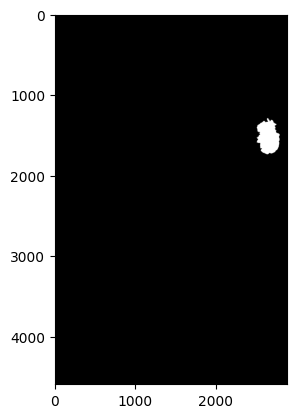

In [ ]:
for file in roi_mask_images[:5]:
  print("Attempting to open:", file)

  if not os.path.exists(file):
    print(f"Error: File not found: {file}")
    continue

  roi_mask_images_show = PIL.Image.open(file)
  gray_img= roi_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/1-149.jpg
Attempting to open: /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/1-003.jpg


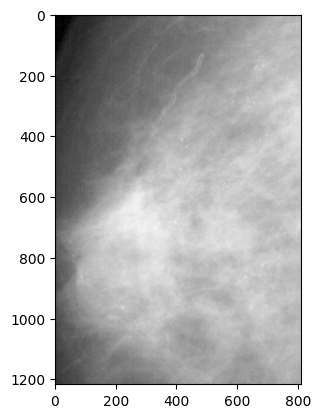

In [ ]:
for file in cropped_images[:5]:
  print("Attempting to open:", file)

  if not os.path.exists(file):
    print(f"Error: File not found: {file}")
    continue

  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [ ]:
for file in full_mammogram_images[1:5]:
  print("Attempting to open:", file)

  if not os.path.exists(file):
    print(f"Error: File not found: {file}")
    continue

  full_mammogram_images_show = PIL.Image.open(file)
  gray_img = full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')
  plt.show()

In [ ]:
dicom_df['BodyPartExamined'].value_counts()

BodyPartExamined
BREAST          9671
Left Breast      318
Right Breast     248
Name: count, dtype: int64

In [ ]:
fig = px.histogram(dicom_df, x='BodyPartExamined',
                   color='BodyPartExamined', title='Body Part Examined',
                   text_auto=True)
fig.update_traces(textposition='outside')
fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

The most examined body part is the entire breast, with approximately `9600` images


In [ ]:
dicom_df['PatientOrientation'].replace({'MLO': 'MLO; Side View',
                                        'CC': 'CC; Top-Down View'}, inplace=True)
dicom_df['PatientOrientation'].value_counts()

PatientOrientation
MLO; Side View       5434
CC; Top-Down View    4803
Name: count, dtype: int64

In [ ]:
fig = px.pie(dicom_df, names=dicom_df['PatientOrientation'], color=dicom_df['PatientOrientation'],
             color_discrete_sequence=px.colors.sequential.Burg,
             category_orders={'PatientOrientation':["MLO View", "CC View"]})
fig.update_layout(title_text='Patient Orientation Percentage Distribution', title_x=0.5,
                  title_font=dict(size=24))
fig.show()

The patient oreintation distribution is nearly equally distributed with:


*   `MLO` view, side view that shows the greatest amount of breast tissue, has been used 53% of the time.
*   `CC` view, top-down view of the breast that shows the deep medial tissue, has been used 46% of the time.



In [ ]:
# orientation and parts examined
fig = px.histogram(dicom_df, x='BodyPartExamined', color='PatientOrientation',
                   color_discrete_sequence=px.colors.sequential.RdBu,
                   category_orders={'PatientOrientation':["MLO View", "CC View"]},
                   title='Body Part Examined', barmode='group',
                   text_auto=True)
fig.update_traces(textposition='outside', textangle=0, cliponaxis=False, textfont_size=9)
fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

For the specific part of the breast examined:


1.   `Breast` MLO view has been used more than CC view, with a difference of `585` images between the two orientations
2.   `Left Breast` and `Right Breast` MLO view has also been used more than CC view but with a smaller difference



In [ ]:
# Series description
dicom_df['SeriesDescription'].value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [ ]:
dicom_df['SeriesDescription'] = dicom_df['SeriesDescription'].fillna('Unknown')

The missing values of the SeriesDescription have been replaced by unknown to avoid inaccuracies with the data

In [ ]:
fig = px.histogram(dicom_df, x='SeriesDescription', color='SeriesDescription',
                   color_discrete_sequence=px.colors.sequential.Burg, text_auto=True,
                   title="Mammogram Type",)
# change color of the unknown, to stand out
fig.data[2].marker.color = 'black'

fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

There is an equal distibution between the `cropped images`, `full mammogram images` and `ROI mask images`, with `566 unknown` images

To fill some of the missing values of the series description feature, we will compare with the bits allocated since a masked image consists of black and white colors

In [ ]:
# bits allocated
dicom_df['BitsAllocated'].dtype


dtype('int64')

In [ ]:
# bits allocated vs series description
dicom_df.groupby('SeriesDescription')['BitsAllocated'].value_counts()


SeriesDescription      BitsAllocated
ROI mask images        8                3247
Unknown                8                 320
                       16                246
cropped images         16               3567
full mammogram images  16               2857
Name: count, dtype: int64

Some of the unknown images have been allocated 8 bits, we will assume they belong to the ROI mask images.
The 320 unknown images will be replaced with ROI mask images

In [ ]:
# replace unknown images with ROI mask images
dicom_df.loc[(dicom_df['SeriesDescription'] == 'Unknown') & (dicom_df['BitsAllocated'] == 8), 'SeriesDescription'] = 'ROI mask images'

In [ ]:
# visualizing the series description after replacing the unknown values with ROI mask images
fig = px.histogram(dicom_df, x='SeriesDescription',
                   color='SeriesDescription', color_discrete_sequence=px.colors.sequential.Burg,
                   text_auto=True, title="Mammogram Type")
# change color of the unknown, to stand out
fig.data[3].marker.color = 'black'

fig.update_layout(title_x=0.45, title_font=dict(size=24))
fig.show()

#### Calcification Description set

Calcification is a type of abnormality that may be cancerous, the calcification set consists of the following features:


1. Patient ID, that may be repeated
2. Breast density which are in `four` categories
3. Left or right breast
4. Image view which is similar to the patient orientation
5. Abnormality ID and Abnormality type which is `calcification`
6. The calcification type
7. Calcification distribution
8. Assessment based on the `BI-RADS categories`
9. The pathology results,.....and the paths to the images



In [ ]:
calc_df = pd.read_csv(calc_filepath)
calc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

Based on the above information:

*   There are missing values in the `calc type` and `calc distribution` columns
*   There are 1546 instances and 13 features
*   Most of the feature instances are of the datatype object





In [ ]:
calc_df_cleaning = calc_df.copy()

In [ ]:
calc_df_cleaning.isnull().sum()

patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                   20
calc distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [ ]:
# renaming column names
calc_df_cleaning.rename(columns={'calc type': 'calc_type', 'calc distribution': 'calc_distribution',
                                 'left or right breast': 'left_or_right_breast',
                                 'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
                                 'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
                                 'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
                                 'breast density': 'breast_density'}, inplace=True)

In [ ]:
calc_df_cleaning.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc_type calc_distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped_image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  roi_mask_file_path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
# filling missing values
calc_df_cleaning['calc_type'] = calc_df_cleaning['calc_type'].fillna('Unknown')
calc_df_cleaning['calc_distribution'] = calc_df_cleaning['calc_distribution'].fillna('Unknown')

In [ ]:
calc_df_cleaning.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
roi_mask_file_path         0
dtype: int64

In [ ]:
calc_df_cleaned = calc_df_cleaning.copy()

For the calcification training set, the following analysis will be done:


1.   The pathology distribution
2.   The pathology distibution based on the orientation
3.   The pathology distribution based on the breast density
4.   The pathology distribution based on the BIRADs assessment
5.   The calcification type and distribution
6.   Comparison of calcification type and pathology results



In [ ]:
fig = px.histogram(calc_df_cleaned, x="pathology",
                   color="pathology", color_discrete_sequence=px.colors.sequential.Burgyl,
                   title="Pathology Distribution")
fig.update_layout(title_x=0.4, title_font=dict(size=24))
fig.show()

The pathology results are either `Malignant`, `Benign` and `Benign without callback`, there distributions range very close to each other:


*   Malignant results being the highest followed by benign and finally the benign without callback results




In [ ]:
# malignancy and the breast side
fig = px.histogram(calc_df_cleaned, x="pathology", color="left_or_right_breast",
                   color_discrete_sequence=px.colors.sequential.Burgyl,
                   barmode='group',
                   title="Pathology Distribution", text_auto=True)
fig.update_traces(textposition='outside')
fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

In [ ]:
calc_df_cleaned['breast_density'].value_counts()

breast_density
3    539
2    501
4    331
1    175
Name: count, dtype: int64

In [ ]:
# breast density categories
breast_density_cat = pd.DataFrame({
    'breast_density': [1, 2, 3, 4],
    'categories_description': ['Category A: Breasts are almost all fatty tissue.',
                               'Category B: There are scattered areas of dense glandular and fibrous tissue',
                               'Category C: More of the breast is made of dense glandular and fibrous tissue',
                               'Category D: Breasts are extremely dense']
})
breast_density_cat

breast_density                             categories_description
0               1   Category A: Breasts are almost all fatty tissue.
1               2  Category B: There are scattered areas of dense...
2               3  Category C: More of the breast is made of dens...
3               4            Category D: Breasts are extremely dense

In [ ]:
calc_density_df = calc_df_cleaned['breast_density'].value_counts().reset_index()
calc_density_df = calc_density_df.merge(breast_density_cat, on='breast_density', how='left')
calc_density_df

breast_density  count                             categories_description
0               3    539  Category C: More of the breast is made of dens...
1               2    501  Category B: There are scattered areas of dense...
2               4    331            Category D: Breasts are extremely dense
3               1    175   Category A: Breasts are almost all fatty tissue.

In [ ]:
calc_density_pathology = calc_df_cleaned.groupby(['pathology', 'breast_density'])['breast_density'].value_counts()
calc_density_pathology = calc_density_pathology.reset_index(name='count')
calc_density_pathology

pathology  breast_density  count
0                    BENIGN               1     37
1                    BENIGN               2    164
2                    BENIGN               3    167
3                    BENIGN               4    160
4   BENIGN_WITHOUT_CALLBACK               1     97
5   BENIGN_WITHOUT_CALLBACK               2    163
6   BENIGN_WITHOUT_CALLBACK               3    169
7   BENIGN_WITHOUT_CALLBACK               4     45
8                 MALIGNANT               1     41
9                 MALIGNANT               2    174
10                MALIGNANT               3    203
11                MALIGNANT               4    126

In [ ]:
calc_density_cat_pathology = calc_density_pathology.merge(calc_density_df, on='breast_density', how='left')
calc_density_cat_pathology

pathology  breast_density  count_x  count_y  \
0                    BENIGN               1       37      175   
1                    BENIGN               2      164      501   
2                    BENIGN               3      167      539   
3                    BENIGN               4      160      331   
4   BENIGN_WITHOUT_CALLBACK               1       97      175   
5   BENIGN_WITHOUT_CALLBACK               2      163      501   
6   BENIGN_WITHOUT_CALLBACK               3      169      539   
7   BENIGN_WITHOUT_CALLBACK               4       45      331   
8                 MALIGNANT               1       41      175   
9                 MALIGNANT               2      174      501   
10                MALIGNANT               3      203      539   
11                MALIGNANT               4      126      331   

                               categories_description  
0    Category A: Breasts are almost all fatty tissue.  
1   Category B: There are scattered areas of dense...  
2   Category C: More of the breast is made of dens...  
3             Category D: Breasts are extremely dense  
4    Category A: Breasts are almost all fatty tissue.  
5   Category B: There are scattered areas of dense...  
6   Category C: More of the breast is made of dens...  
7             Category D: Breasts are extremely dense  
8    Category A: Breasts are almost all fatty tissue.  
9   Category B: There are scattered areas of dense...  
10  Category C: More of the breast is made of dens...  
11            Category D: Breasts are extremely dense

In [ ]:
fig = px.bar(calc_density_cat_pathology, x='pathology',
             barmode='group', y='count_x',
             color='categories_description')
fig.update_layout(title_text='Pathology Based on Breast Density',
                  title_x=0.10, title_font=dict(size=24))
fig.show()

In [ ]:
calc_df_cleaned.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc_type calc_distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification      Unknown          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped_image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  roi_mask_file_path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
calc_type_df = pd.DataFrame(calc_df_cleaned['calc_type'].value_counts())
calc_type_df.reset_index(inplace=True)
calc_type_df = calc_type_df.rename(columns={'count': 'calc_type_count'})
calc_type_df.head()


calc_type  calc_type_count
0    PLEOMORPHIC              664
1      AMORPHOUS              138
2       PUNCTATE              106
3  LUCENT_CENTER               93
4       VASCULAR               82

In [ ]:
fig = px.histogram(calc_type_df, y='calc_type', x='calc_type_count', color='calc_type', orientation='h', title='Calcification Type Distribution')
fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

In [ ]:
# plotting calcification greater than 10
fig = px.histogram(calc_type_df[calc_type_df['calc_type_count'] > 10], y='calc_type', x='calc_type_count', color='calc_type', title='Calcification Type Distribution')
fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

In [ ]:
calc_dist_df = pd.DataFrame(calc_df_cleaned['calc_distribution'].value_counts())
calc_dist_df.reset_index(inplace=True)
calc_dist_df = calc_dist_df.rename(columns={'count': 'calc_distribution_count'})
calc_dist_df.head()

calc_distribution  calc_distribution_count
0         CLUSTERED                      740
1           Unknown                      376
2         SEGMENTAL                      168
3          REGIONAL                       99
4            LINEAR                       90

In [ ]:
fig = px.histogram(calc_dist_df, x="calc_distribution", y='calc_distribution_count', color="calc_distribution", title="Calcification Distribution")
fig.update_layout(title_x=0.5, title_font=dict(size=24))
fig.show()

In [ ]:
calc_type_vs_pathology = calc_df_cleaned.groupby(['pathology', 'calc_type'])['calc_type'].count().reset_index(name='count')
calc_type_vs_pathology

pathology                       calc_type  count
0      BENIGN                       AMORPHOUS     83
1      BENIGN           AMORPHOUS-PLEOMORPHIC      6
2      BENIGN                          COARSE      3
3      BENIGN              COARSE-PLEOMORPHIC      2
4      BENIGN                      DYSTROPHIC     12
..        ...                             ...    ...
59  MALIGNANT  PUNCTATE-FINE_LINEAR_BRANCHING      6
60  MALIGNANT            PUNCTATE-PLEOMORPHIC     10
61  MALIGNANT               ROUND_AND_REGULAR      3
62  MALIGNANT      ROUND_AND_REGULAR-PUNCTATE      1
63  MALIGNANT                         Unknown      1

[64 rows x 3 columns]

In [ ]:
# benign visualization
fig = px.histogram(calc_df_cleaned[calc_df_cleaned['pathology'] == 'BENIGN'],
                   x='calc_type', color='calc_type')
fig.update_layout(title_text='Calcification Type Distribution for Benign',
                  title_x=0.5, title_font=dict(size=24))
fig.show()

In [ ]:
# benign without callback visualization
fig = px.histogram(calc_df_cleaned[(calc_df_cleaned['pathology'] == 'BENIGN_WITHOUT_CALLBACK')],
                                   x='calc_type', color='calc_type')
fig.update_layout(title_text='Calcification Type Distribution for Benign Without Callback', title_x=0.5,
                  title_font=dict(size=24))
fig.show()

In [ ]:
# visualization of malignancy with the calcification type
fig = px.histogram(calc_df_cleaned[calc_df_cleaned['pathology'] == 'MALIGNANT'],
                   x='calc_type', color='calc_type')
fig.update_layout(title_text='Calcification Type Distribution for Malignant',
                  title_x=0.5, title_font=dict(size=24))
fig.show()

BI-RADS Assessment

In [ ]:
calc_df['assessment'].value_counts()

assessment
4    753
2    482
5    159
3     89
0     63
Name: count, dtype: int64

In [ ]:
# replacing assessment values with the actual values
bi_rads_assessment = pd.DataFrame({
    'assessment': [0, 1, 2, 3, 4, 5, 6],
    'assessment_description': ['Incomplete - Additional imaging evaluation and/or comparison to prior mammograms (or other imaging tests) is needed',
                               'Negative: A normal test result',
                               'Benign: Non-cancerous finding',
                               'Probably benign:  Follow-up in a short time frame is suggested',
                               'Suspicious abnormality: Biopsy should be considered',
                               'Highly suggestive of malignancy: Biopsy is highly recommended',
                               'Known biopsy-proven malignancy']
    })
bi_rads_assessment


assessment                             assessment_description
0           0  Incomplete - Additional imaging evaluation and...
1           1                     Negative: A normal test result
2           2                      Benign: Non-cancerous finding
3           3  Probably benign:  Follow-up in a short time fr...
4           4  Suspicious abnormality: Biopsy should be consi...
5           5  Highly suggestive of malignancy: Biopsy is hig...
6           6                     Known biopsy-proven malignancy

In [ ]:
calc_df_assessment = calc_df_cleaned['assessment'].value_counts().reset_index()
calc_df_assessment = calc_df_assessment.merge(bi_rads_assessment, on='assessment', how='left')
calc_df_assessment

assessment  count                             assessment_description
0           4    753  Suspicious abnormality: Biopsy should be consi...
1           2    482                      Benign: Non-cancerous finding
2           5    159  Highly suggestive of malignancy: Biopsy is hig...
3           3     89  Probably benign:  Follow-up in a short time fr...
4           0     63  Incomplete - Additional imaging evaluation and...

In [ ]:
# grouping pathology and assessment
calc_pathology = calc_df_cleaned.groupby(['pathology', 'assessment'])['pathology'].value_counts()
calc_pathology = calc_pathology.reset_index(name='count')
calc_pathology


pathology  assessment  count
0                    BENIGN           0     32
1                    BENIGN           2     14
2                    BENIGN           3     49
3                    BENIGN           4    431
4                    BENIGN           5      2
5   BENIGN_WITHOUT_CALLBACK           2    467
6   BENIGN_WITHOUT_CALLBACK           3      4
7   BENIGN_WITHOUT_CALLBACK           4      3
8                 MALIGNANT           0     31
9                 MALIGNANT           2      1
10                MALIGNANT           3     36
11                MALIGNANT           4    319
12                MALIGNANT           5    157

In [ ]:
# merging pathology and assessment
calc_pathology = calc_pathology.merge(calc_df_assessment, on='assessment', how='left')
calc_pathology

pathology  assessment  count_x  count_y  \
0                    BENIGN           0       32       63   
1                    BENIGN           2       14      482   
2                    BENIGN           3       49       89   
3                    BENIGN           4      431      753   
4                    BENIGN           5        2      159   
5   BENIGN_WITHOUT_CALLBACK           2      467      482   
6   BENIGN_WITHOUT_CALLBACK           3        4       89   
7   BENIGN_WITHOUT_CALLBACK           4        3      753   
8                 MALIGNANT           0       31       63   
9                 MALIGNANT           2        1      482   
10                MALIGNANT           3       36       89   
11                MALIGNANT           4      319      753   
12                MALIGNANT           5      157      159   

                               assessment_description  
0   Incomplete - Additional imaging evaluation and...  
1                       Benign: Non-cancerous finding  
2   Probably benign:  Follow-up in a short time fr...  
3   Suspicious abnormality: Biopsy should be consi...  
4   Highly suggestive of malignancy: Biopsy is hig...  
5                       Benign: Non-cancerous finding  
6   Probably benign:  Follow-up in a short time fr...  
7   Suspicious abnormality: Biopsy should be consi...  
8   Incomplete - Additional imaging evaluation and...  
9                       Benign: Non-cancerous finding  
10  Probably benign:  Follow-up in a short time fr...  
11  Suspicious abnormality: Biopsy should be consi...  
12  Highly suggestive of malignancy: Biopsy is hig...

In [ ]:
# visualize the pathology based on the assessment
fig = px.bar(calc_pathology, x='pathology', barmode='group', y='count_x', color='assessment_description')
fig.update_layout(title_text='Pathology Based on BI-RADS Assessment', title_x=0.5,
                  title_font=dict(size=24))
fig.show()

In [ ]:
# subtlety
calc_df_cleaned['subtlety'].value_counts()

subtlety
3    502
5    361
4    346
2    242
1     95
Name: count, dtype: int64

#### Mass Description set

Mass is another type of abnormality that is identified as either cancerous of non_cancerous depending on the mass shape and the mass margin. This set contains different attributes of the mass of the tumor and the different reports depending in the mass

The following of are some of the attributes:
1. Patient id
2. Body part examined; left or right breast
3. The orientation of the patient during the mammography
4. Abnormality id and abnormality type
5. Mass shape and Mass margin
6. BI-RADS Assessment
7. Pathology results
8. Subtlety Ratings
10. Images file path



In [ ]:
# information about the dataset
mass_df = pd.read_csv(mass_filepath)
mass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [ ]:
mass_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

Based on the above information on the mass dataframe:
- there are 14 features and each feature consists of 1318 instances.
- only the `mass shape` and `mass margins` contain missing values
- most of the features have instances of the data type object, with only the `breast density`, `abnormality id`, `assessment` and `subtlety` having the data type integer


Data cleaning

In [ ]:
# renaming the columns
mass_df = mass_df.rename(columns={'mass shape': 'mass_shape', 'mass margins': 'mass_margin',
                                 'left or right breast': 'left_or_right_breast',
                                 'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
                                 'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
                                 'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
                                 'breast density': 'breast_density'})

**Missing values will be handled as the EDA is being performed**

In order to understand the mass dataset the following questions need to be answered:
1. What is the pathology distribution?
2. How is the pathology distribution in terms of mass shape?
3. How is the pathology distribution in terms of the mass margin?
4. Whish is the most frequently used image view when performing the mammography?
5. How can the assessments be compared to the pathology results?
6. How can the breast density be compared to the pathology results?

In [ ]:
mass_pathology = mass_df['pathology'].value_counts().reset_index()
mass_pathology['pathology'].replace({'BENIGN_WITHOUT_CALLBACK': 'benign without callback',
                                     'MALIGNANT': 'malignant',
                                     'BENIGN': 'benign'}, inplace=True)
mass_pathology

pathology  count
0                malignant    637
1                   benign    577
2  benign without callback    104

In [ ]:
labels = mass_pathology['pathology']
values = mass_pathology['count']
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             marker_colors=px.colors.sequential.Agsunset,
                             textinfo='label+percent', insidetextorientation='radial',
                             pull=[0, 0, 0.2])])
fig.update_layout(title_text='Pathology Distribution in terms of Mass Abnormality',
                  title_x=0.5, title_font=dict(size=24), uniformtext_minsize=12,
                  uniformtext_mode='hide')
fig.show()

In [ ]:
mass_df['mass_shape'] = mass_df['mass_shape'].fillna('Unknown')
mass_df['mass_margin'] = mass_df['mass_margin'].fillna('Unknown')
mass_df.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margin                0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
roi_mask_file_path         0
dtype: int64

In [ ]:
mass_df['mass_shape'].value_counts()

mass_shape
IRREGULAR                                   351
OVAL                                        321
LOBULATED                                   305
ROUND                                       123
ARCHITECTURAL_DISTORTION                     80
IRREGULAR-ARCHITECTURAL_DISTORTION           45
LYMPH_NODE                                   26
ASYMMETRIC_BREAST_TISSUE                     20
FOCAL_ASYMMETRIC_DENSITY                     19
OVAL-LYMPH_NODE                               6
LOBULATED-IRREGULAR                           5
Unknown                                       4
ROUND-OVAL                                    3
LOBULATED-LYMPH_NODE                          3
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY            2
LOBULATED-ARCHITECTURAL_DISTORTION            2
LOBULATED-OVAL                                1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
ROUND-LOBULATED                               1
Name: count, dtype: int64

In [ ]:
# visualize mass shape and the pathology results
fig = px.histogram(mass_df, x='mass_shape', color='pathology',
                   barmode='group')
fig.update_layout(title_text='Mass Shape Distribution', title_x=0.45,
                  title_font=dict(size=24))
fig.show()

In [ ]:
mass_df["mass_margin"].value_counts()

mass_margin
CIRCUMSCRIBED                            305
SPICULATED                               281
ILL_DEFINED                              278
OBSCURED                                 197
MICROLOBULATED                           108
Unknown                                   43
CIRCUMSCRIBED-ILL_DEFINED                 27
ILL_DEFINED-SPICULATED                    25
OBSCURED-ILL_DEFINED                      19
CIRCUMSCRIBED-OBSCURED                    19
OBSCURED-SPICULATED                        4
OBSCURED-ILL_DEFINED-SPICULATED            4
MICROLOBULATED-ILL_DEFINED                 3
MICROLOBULATED-ILL_DEFINED-SPICULATED      2
MICROLOBULATED-SPICULATED                  2
CIRCUMSCRIBED-MICROLOBULATED               1
Name: count, dtype: int64

In [ ]:
# visualize mass margin with the pathology results
fig = px.histogram(mass_df, x='mass_margin', color='pathology',
                   barmode='group')
fig.update_layout(title_text='Mass Margin Distribution', title_x=0.45,
                  title_font=dict(size=24))
fig.show()

In [ ]:
mass_df['image_view'].value_counts()

image_view
MLO    711
CC     607
Name: count, dtype: int64

In [ ]:
# image view and the pathology results using a pie chart
fig = px.histogram(mass_df, x='image_view', color='pathology',
                   barmode='group', text_auto=True)
fig.update_traces(textposition='outside')
fig.update_layout(title_text='Image View Distribution and the Pathology Results', title_x=0.45,
                  title_font=dict(size=24))
fig.show()

In [ ]:
# body part examined
mass_df['left_or_right_breast'].value_counts()

left_or_right_breast
RIGHT    687
LEFT     631
Name: count, dtype: int64

In [ ]:
fig = px.histogram(mass_df, x='left_or_right_breast',
                   color='pathology', barmode='group',
                   text_auto=True)
fig.update_traces(textposition='outside')
fig.update_layout(title_text='Body Part Examined Distribution and the Pathology results',
                  title_x=0.45, title_font=dict(size=24))
fig.show()

In [ ]:
mass_df['assessment'].value_counts()

assessment
4    533
5    299
3    279
0    129
2     77
1      1
Name: count, dtype: int64

In [ ]:
bi_rads_assessment

assessment                             assessment_description
0           0  Incomplete - Additional imaging evaluation and...
1           1                     Negative: A normal test result
2           2                      Benign: Non-cancerous finding
3           3  Probably benign:  Follow-up in a short time fr...
4           4  Suspicious abnormality: Biopsy should be consi...
5           5  Highly suggestive of malignancy: Biopsy is hig...
6           6                     Known biopsy-proven malignancy

In [ ]:
mass_df_assessment = mass_df['assessment'].value_counts().reset_index()
mass_df_assessment = mass_df_assessment.merge(bi_rads_assessment, on='assessment', how='left')
mass_df_assessment

assessment  count                             assessment_description
0           4    533  Suspicious abnormality: Biopsy should be consi...
1           5    299  Highly suggestive of malignancy: Biopsy is hig...
2           3    279  Probably benign:  Follow-up in a short time fr...
3           0    129  Incomplete - Additional imaging evaluation and...
4           2     77                      Benign: Non-cancerous finding
5           1      1                     Negative: A normal test result

In [ ]:
mass_pathology_and_assessment = mass_df.groupby(['pathology', 'assessment'])['pathology'].value_counts()
mass_pathology_and_assessment = mass_pathology_and_assessment.reset_index(name='count')
mass_pathology_and_assessment

pathology  assessment  count
0                    BENIGN           0    110
1                    BENIGN           2     28
2                    BENIGN           3    189
3                    BENIGN           4    246
4                    BENIGN           5      4
5   BENIGN_WITHOUT_CALLBACK           2     49
6   BENIGN_WITHOUT_CALLBACK           3     45
7   BENIGN_WITHOUT_CALLBACK           4      8
8   BENIGN_WITHOUT_CALLBACK           5      2
9                 MALIGNANT           0     19
10                MALIGNANT           1      1
11                MALIGNANT           3     45
12                MALIGNANT           4    279
13                MALIGNANT           5    293

In [ ]:
mass_pathology_and_assessment = mass_pathology_and_assessment.merge(mass_df_assessment, on='assessment', how='left')
mass_pathology_and_assessment

pathology  assessment  count_x  count_y  \
0                    BENIGN           0      110      129   
1                    BENIGN           2       28       77   
2                    BENIGN           3      189      279   
3                    BENIGN           4      246      533   
4                    BENIGN           5        4      299   
5   BENIGN_WITHOUT_CALLBACK           2       49       77   
6   BENIGN_WITHOUT_CALLBACK           3       45      279   
7   BENIGN_WITHOUT_CALLBACK           4        8      533   
8   BENIGN_WITHOUT_CALLBACK           5        2      299   
9                 MALIGNANT           0       19      129   
10                MALIGNANT           1        1        1   
11                MALIGNANT           3       45      279   
12                MALIGNANT           4      279      533   
13                MALIGNANT           5      293      299   

                               assessment_description  
0   Incomplete - Additional imaging evaluation and...  
1                       Benign: Non-cancerous finding  
2   Probably benign:  Follow-up in a short time fr...  
3   Suspicious abnormality: Biopsy should be consi...  
4   Highly suggestive of malignancy: Biopsy is hig...  
5                       Benign: Non-cancerous finding  
6   Probably benign:  Follow-up in a short time fr...  
7   Suspicious abnormality: Biopsy should be consi...  
8   Highly suggestive of malignancy: Biopsy is hig...  
9   Incomplete - Additional imaging evaluation and...  
10                     Negative: A normal test result  
11  Probably benign:  Follow-up in a short time fr...  
12  Suspicious abnormality: Biopsy should be consi...  
13  Highly suggestive of malignancy: Biopsy is hig...

In [ ]:
fig = px.bar(mass_pathology_and_assessment, x='pathology',
             barmode='group', y='count_x', color='assessment_description')
fig.update_layout(title_text='Pathology Based on BI-RADS Assessment', title_x=0.15,
                  title_font=dict(size=24))
fig.show()

In [ ]:
# breast density and the pathology results
mass_df['breast_density'].value_counts()

breast_density
2    585
3    337
1    287
4    109
Name: count, dtype: int64

In [ ]:
breast_density_cat = pd.DataFrame({
    "breast_density": [1, 2, 3, 4],
    "breast_density_description":[
        'Category A: Breasts are almost all fatty tissue.',
        'Category B: There are scattered areas of dense glandular and fibrous tissue',
        'Category C: More of the breast is made of dense glandular and fibrous tissue',
        'Category D: Breasts are extremely dense']
})
breast_density_cat

breast_density                         breast_density_description
0               1   Category A: Breasts are almost all fatty tissue.
1               2  Category B: There are scattered areas of dense...
2               3  Category C: More of the breast is made of dens...
3               4            Category D: Breasts are extremely dense

In [ ]:
mass_breast_density = mass_df['breast_density'].value_counts().reset_index()
mass_breast_density = mass_breast_density.merge(breast_density_cat, on='breast_density', how='left')
mass_breast_density

breast_density  count                         breast_density_description
0               2    585  Category B: There are scattered areas of dense...
1               3    337  Category C: More of the breast is made of dens...
2               1    287   Category A: Breasts are almost all fatty tissue.
3               4    109            Category D: Breasts are extremely dense

In [ ]:
mass_breast_density_pathology = mass_df.groupby(['pathology', 'breast_density'])['breast_density'].value_counts()
mass_breast_density_pathology = mass_breast_density_pathology.reset_index(name='count')
mass_breast_density_pathology

pathology  breast_density  count
0                    BENIGN               1    103
1                    BENIGN               2    264
2                    BENIGN               3    153
3                    BENIGN               4     57
4   BENIGN_WITHOUT_CALLBACK               1     48
5   BENIGN_WITHOUT_CALLBACK               2     37
6   BENIGN_WITHOUT_CALLBACK               3     14
7   BENIGN_WITHOUT_CALLBACK               4      5
8                 MALIGNANT               1    136
9                 MALIGNANT               2    284
10                MALIGNANT               3    170
11                MALIGNANT               4     47

In [ ]:
mass_bd_cat_pathology = mass_breast_density_pathology.merge(mass_breast_density, on='breast_density', how='left')
mass_bd_cat_pathology

pathology  breast_density  count_x  count_y  \
0                    BENIGN               1      103      287   
1                    BENIGN               2      264      585   
2                    BENIGN               3      153      337   
3                    BENIGN               4       57      109   
4   BENIGN_WITHOUT_CALLBACK               1       48      287   
5   BENIGN_WITHOUT_CALLBACK               2       37      585   
6   BENIGN_WITHOUT_CALLBACK               3       14      337   
7   BENIGN_WITHOUT_CALLBACK               4        5      109   
8                 MALIGNANT               1      136      287   
9                 MALIGNANT               2      284      585   
10                MALIGNANT               3      170      337   
11                MALIGNANT               4       47      109   

                           breast_density_description  
0    Category A: Breasts are almost all fatty tissue.  
1   Category B: There are scattered areas of dense...  
2   Category C: More of the breast is made of dens...  
3             Category D: Breasts are extremely dense  
4    Category A: Breasts are almost all fatty tissue.  
5   Category B: There are scattered areas of dense...  
6   Category C: More of the breast is made of dens...  
7             Category D: Breasts are extremely dense  
8    Category A: Breasts are almost all fatty tissue.  
9   Category B: There are scattered areas of dense...  
10  Category C: More of the breast is made of dens...  
11            Category D: Breasts are extremely dense

In [ ]:
fig = px.bar(mass_bd_cat_pathology, x='pathology',
             barmode='group', y='count_x', color='breast_density_description')
fig.update_layout(title_text='Pathology Based on Breast Density', title_x=0.15,
                  title_font=dict(size=24))
fig.show()

In [ ]:
meta_df = pd.read_csv(meta_filepath)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


In [ ]:
meta_df.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

#### CONCLUSION

1. Majority of the instances are of the object datatype, for the model training we'll have to handle the categorical data without losing any important information
2. The images are in `jpeg` format but doesn't mean that all the users will upload them in the same format, we'll have to consider the image format when developing the diagnosis system.
3. There are still missing values in the different sets and abstract features; correlation of the different features will be done to determine whether some columns should be droppped or replaced
4. There are different patient orientations, our system will have to consider the image view before making predictions
5. Some of the images are missing in our dataset, the columns we'll have to be dropped
6. More research needs to be done on the calcification abnormality and mass abnormality to get familiar with the terminologies

#### Data Preprocessing

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL
import cv2

import tensorflow as tf

import os

%matplotlib inline

In [ ]:
calc_train_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/calc_case_description_train_set.csv'
calc_test_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/calc_case_description_test_set.csv'
mass_train_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/mass_case_description_train_set.csv'
mass_test_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/mass_case_description_test_set.csv'
dicom_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/dicom_info.csv'
meta_filepath = '/content/drive/MyDrive/CBIS-DDSM/csv/meta.csv'

In [ ]:
calc_train_df = pd.read_csv(calc_train_filepath)
calc_test_df = pd.read_csv(calc_test_filepath)
mass_train_df = pd.read_csv(mass_train_filepath)
mass_test_df = pd.read_csv(mass_test_filepath)
dicom_df = pd.read_csv(dicom_filepath)
meta_df = pd.read_csv(meta_filepath)

In [ ]:
dicom_df.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

### Feature engineering

In [ ]:
# dicom dataset
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [ ]:
null_cols_to_be_removed = {
    "AccessionNumber", "PatientBirthDate", "PatientSex",
    "ReferringPhysicianName", "StudyTime",  "StudyDate",
    "Laterality", "SOPInstanceUID", "SOPClassUID"
}

dicom_df.drop(columns=null_cols_to_be_removed, inplace=True)

In [ ]:
dicom_df.SeriesInstanceUID, dicom_df.SeriesInstanceUID.nunique()

(0        1.3.6.1.4.1.9590.100.1.2.129308726812851964007...
 1        1.3.6.1.4.1.9590.100.1.2.248386742010678582309...
 2        1.3.6.1.4.1.9590.100.1.2.267213171011171858918...
 3        1.3.6.1.4.1.9590.100.1.2.381187369611524586537...
 4        1.3.6.1.4.1.9590.100.1.2.381187369611524586537...
                                ...                        
 10232    1.3.6.1.4.1.9590.100.1.2.627982547125586065005...
 10233    1.3.6.1.4.1.9590.100.1.2.824512568105677732346...
 10234    1.3.6.1.4.1.9590.100.1.2.247594800112988856209...
 10235    1.3.6.1.4.1.9590.100.1.2.285138900913160236325...
 10236    1.3.6.1.4.1.9590.100.1.2.285138900913160236325...
 Name: SeriesInstanceUID, Length: 10237, dtype: object,
 6774)

In [ ]:
dicom_df.SeriesInstanceUID.duplicated().sum()

3463

In [ ]:
dicom_df.StudyInstanceUID, dicom_df.StudyInstanceUID.nunique(), dicom_df.StudyInstanceUID.duplicated().sum()

(0        1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
 1        1.3.6.1.4.1.9590.100.1.2.161516517311681906612...
 2        1.3.6.1.4.1.9590.100.1.2.291043622711253836701...
 3        1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
 4        1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
                                ...                        
 10232    1.3.6.1.4.1.9590.100.1.2.310901637111684385906...
 10233    1.3.6.1.4.1.9590.100.1.2.246896536912401556922...
 10234    1.3.6.1.4.1.9590.100.1.2.150339554012064216510...
 10235    1.3.6.1.4.1.9590.100.1.2.426769868613284096628...
 10236    1.3.6.1.4.1.9590.100.1.2.426769868613284096628...
 Name: StudyInstanceUID, Length: 10237, dtype: object,
 6774,
 3463)

In [ ]:
meta_df.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [ ]:
meta_df.SeriesInstanceUID.duplicated().sum(), meta_df.StudyInstanceUID.duplicated().sum()

(0, 0)

comment: SeriesInstanceUID can be the primarykey

In [ ]:
dicom_df.SeriesDescription.value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [ ]:
# calcification dataset
calc_train_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
calc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [ ]:
calc_train_df.rename(columns={
    'calc type': 'calc_type', 'calc distribution': 'calc_distribution',
    'left or right breast': 'left_or_right_breast',
    'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
    'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
    'breast density': 'breast_density'
}, inplace=True)

calc_test_df.rename(columns={
    'calc type': 'calc_type', 'calc distribution': 'calc_distribution',
    'left or right breast': 'left_or_right_breast',
    'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
    'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
    'breast density': 'breast_density'
}, inplace=True)

In [ ]:
calc_train_df.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
roi_mask_file_path           0
dtype: int64

In [ ]:
calc_train_df.calc_distribution.unique()

array(['CLUSTERED', 'LINEAR', 'REGIONAL', 'DIFFUSELY_SCATTERED',
       'SEGMENTAL', nan, 'CLUSTERED-LINEAR', 'CLUSTERED-SEGMENTAL',
       'LINEAR-SEGMENTAL', 'REGIONAL-REGIONAL'], dtype=object)

In [ ]:
# checking the number or rows for all the sets
len(calc_train_df), len(calc_test_df), len(mass_train_df), len(mass_test_df)

(1546, 326, 1318, 378)

In [ ]:
len(calc_train_df) + len(calc_test_df) + len(mass_train_df) + len(mass_test_df)

3568

In [ ]:
meta_df.shape

(6775, 9)

In [ ]:
meta_df.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [ ]:
meta_df.nunique()

SeriesInstanceUID    6775
StudyInstanceUID     6775
Modality                1
SeriesDescription       3
BodyPartExamined        1
SeriesNumber            1
Collection              1
Visibility              1
ImageCount              2
dtype: int64

**About the meta set**

* SeriesInstanceUID - this is a unique identifier of the mammogram images
* StudyInstanceUID - another unique identifier for the studies done on the images
* Modality - specifies the type of equipment used to perform the imaging, in this case, MG (mammogram)
* SeriesDescription - a description of the angle of the images taken
* BodyPartExamined - the body part where the imaging was performed
* SeriesNumber -
* Collection - indicates the source of the data
* Visibility - "1" indicates if it is visible and "0" if not visible
* ImageCount - number of images in the series


**Columns to be removed**
* Modality - because it is only mammograms
* SeriesNumber and Visibility they just indicate one value
* Collection - the source is only the CBIS-DDSM





In [ ]:
meta_columns_to_be_removed = {"Modality", "SeriesNumber", "Visibility", "Collection"}

meta_df.drop(columns=meta_columns_to_be_removed, inplace=True)

In [ ]:
len(dicom_df)

10237

In [ ]:
dicom_df.nunique()

file_path                                      10237
image_path                                     10237
BitsAllocated                                      2
BitsStored                                         2
BodyPartExamined                                   3
Columns                                         1208
ContentDate                                        5
ContentTime                                     6774
ConversionType                                     1
HighBit                                            2
InstanceNumber                                     1
LargestImagePixelValue                           235
Modality                                           1
PatientID                                       6990
PatientName                                     6575
PatientOrientation                                 2
PhotometricInterpretation                          1
PixelRepresentation                                1
Rows                                            1077
SamplesPerPixel                                    1
SecondaryCaptureDeviceManufacturer                 2
SecondaryCaptureDeviceManufacturerModelName        1
SeriesDescription                                  3
SeriesInstanceUID                               6774
SeriesNumber                                       1
SmallestImagePixelValue                         3025
SpecificCharacterSet                               1
StudyID                                            1
StudyInstanceUID                                6774
dtype: int64

**about the dicom set**

The dicom set has  all the columns compared to the calcification and mass sets. About each column:
* file_path - these are the original filepaths to the images
* image_path - this is the path to the image itself
* AccessionNumber
* BitsAllocated - this are the number of bits allocated per pixel
* BitsStores - the number of bits used to store the pixel values
* BodyPartExamined - Similar to the meta set, contains the body part where the imaging was performed
* Columns
* ContentDate - the date the image was processed - useless in our usecas
* ContentTime - the time the image was processed - useless in our usecase
* ConversionType - the type of conversion applied to the image
* HighBit
* InstanceNumber
* LargestImagePixelValue
* Laterality - the angle the patient was in when the imaging was performed
* Modality - similar to meta set
* PatientBirthDate - supposed to show the birth dates of the patient but all values are missing
* PatientID - unique identifier of the patient
* PatientName
* PatientOrientation - patient orientation relative to the imaging device
* PatientSex - all values are missing
* PhotometricInterpretation - how the pixel data should be interpreted
* PixelRepresentation - contain the signed and unsigned pixel values
* ReferringPhysicianName - all values are missing
* Rows
* SOPClassUID
* SOPInstanceUID
* SamplePerPixel
* SecondaryCaptureDeviceManufacturer
* SecondaryCaptureManufacturerModelName
* SeriesDescription
* SeriesInstanceUID
* SmallestImagePixelValue
* SpecificCharacterSet
* StudyDate
* StudyID
* StudyInstanceUID
* StudyTime

In [ ]:
# All
dicom_df = dicom_df.loc[:, dicom_df.nunique() > 1]

In [ ]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   file_path                           10237 non-null  object 
 1   image_path                          10237 non-null  object 
 2   BitsAllocated                       10237 non-null  int64  
 3   BitsStored                          10237 non-null  int64  
 4   BodyPartExamined                    10237 non-null  object 
 5   Columns                             10237 non-null  int64  
 6   ContentDate                         10237 non-null  int64  
 7   ContentTime                         10237 non-null  float64
 8   HighBit                             10237 non-null  int64  
 9   LargestImagePixelValue              10237 non-null  int64  
 10  PatientID                           10237 non-null  object 
 11  PatientName                         10237

In [ ]:
dicom_df.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  BitsAllocated  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...             16   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...             16   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...             16   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...             16   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              8   

   BitsStored BodyPartExamined  Columns  ContentDate  ContentTime  HighBit  \
0          16           BREAST      351     20160426   131732.685       15   
1          16           BREAST     3526     20160426   143829.101       15   
2          16           BREAST     1546     20160503   111956.298       15   
3          16           BREAST       97     20160503   115347.770       15   
4           8      Left Breast     3104     20160503   115347.770        7   

   LargestImagePixelValue                          PatientID  \
0                   65535  Mass-Training_P_01265_RIGHT_MLO_1   
1                   65535     Mass-Training_P_01754_RIGHT_CC   
2                   65535     Calc-Training_P_00232_RIGHT_CC   
3                   65535        Calc-Test_P_00562_LEFT_CC_2   
4                     255              P_00562_LEFT_CC_2.dcm   

                         PatientName PatientOrientation  Rows  \
0  Mass-Training_P_01265_RIGHT_MLO_1                MLO   289   
1     Mass-Training_P_01754_RIGHT_CC                 CC  6256   
2     Calc-Training_P_00232_RIGHT_CC                 CC  4126   
3        Calc-Test_P_00562_LEFT_CC_2                 CC    97   
4                    P_00562^P_00562                 CC  4560   

  SecondaryCaptureDeviceManufacturer      SeriesDescription  \
0                          MathWorks         cropped images   
1                          MathWorks  full mammogram images   
2                          MathWorks  full mammogram images   
3                          MathWorks         cropped images   
4                          MathWorks                    NaN   

                                   SeriesInstanceUID  SmallestImagePixelValue  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...                    23078   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...                        0   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...                        0   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...                    32298   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...                        0   

                                    StudyInstanceUID  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...

In [ ]:
# merge the dicom set with the meta
dicom_meta_merged = pd.merge(meta_df, dicom_df, on='SeriesInstanceUID', how='outer')
dicom_meta_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10238 entries, 0 to 10237
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SeriesInstanceUID                   10238 non-null  object 
 1   StudyInstanceUID_x                  10238 non-null  object 
 2   SeriesDescription_x                 10238 non-null  object 
 3   BodyPartExamined_x                  10238 non-null  object 
 4   ImageCount                          10238 non-null  int64  
 5   file_path                           10237 non-null  object 
 6   image_path                          10237 non-null  object 
 7   BitsAllocated                       10237 non-null  float64
 8   BitsStored                          10237 non-null  float64
 9   BodyPartExamined_y                  10237 non-null  object 
 10  Columns                             10237 non-null  float64
 11  ContentDate                         10237

some columns have been duplicated during the merge, we can combine them and then drop the duplicated ones


In [ ]:
dicom_meta_merged["SeriesDescription"] = dicom_meta_merged["SeriesDescription_x"].combine_first(dicom_meta_merged["SeriesDescription_y"])
dicom_meta_merged["StudyInstanceUID"] = dicom_meta_merged["StudyInstanceUID_x"].combine_first(dicom_meta_merged["StudyInstanceUID_y"])
dicom_meta_merged["BodyPartExamined"] = dicom_meta_merged["BodyPartExamined_x"].combine_first(dicom_meta_merged["BodyPartExamined_y"])

In [ ]:
# drop duplicated columns
dicom_meta_merged.drop(columns=["SeriesDescription_x", "SeriesDescription_y",
                                "StudyInstanceUID_x", "StudyInstanceUID_y",
                                "BodyPartExamined_x", "BodyPartExamined_y"], inplace=True)


In [ ]:
calc_train_df.rename(columns={
    'calc type': 'calc_type', 'calc distribution': 'calc_distribution',
    'left or right breast': 'left_or_right_breast',
    'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
    'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
    'breast density': 'breast_density'
}, inplace=True)

calc_test_df.rename(columns={
    'calc type': 'calc_type', 'calc distribution': 'calc_distribution',
    'left or right breast': 'left_or_right_breast',
    'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
    'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
    'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
    'breast density': 'breast_density'
}, inplace=True)

In [ ]:
mass_train_df = mass_train_df.rename(columns={'mass shape': 'mass_shape', 'mass margins': 'mass_margin',
                                 'left or right breast': 'left_or_right_breast',
                                 'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
                                 'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
                                 'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
                                 'breast density': 'breast_density'})

mass_test_df = mass_test_df.rename(columns={'mass shape': 'mass_shape', 'mass margins': 'mass_margin',
                                 'left or right breast': 'left_or_right_breast',
                                 'image file path': 'image_file_path', 'cropped image file path': 'cropped_image_file_path',
                                 'ROI mask file path': 'roi_mask_file_path', 'image view': 'image_view',
                                 'abnormality id': 'abnormality_id', 'abnormality type': 'abnormality_type',
                                 'breast density': 'breast_density'})

In [ ]:
# extract the uid from the images file path in the mass set
full_mamm_path = mass_train_df['image_file_path'].iloc[0]
print(full_mamm_path)

full_mamm_uid = full_mamm_path.split('/')[2]
print(full_mamm_uid)

# check if the uid is in the studyinstance or series instance
is_in_study_instance = full_mamm_uid in meta_df['StudyInstanceUID'].values
is_in_series_instance = full_mamm_uid in meta_df['SeriesInstanceUID'].values

print(f"Is in StudyInstanceUID: {is_in_study_instance}")
print(f"Is in SeriesInstanceUID: {is_in_series_instance}")

Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.422112722213189649807611434612228974994/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/000000.dcm
1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515
Is in StudyInstanceUID: False
Is in SeriesInstanceUID: True


Since the `SeriesInstanceUID` matches the UID in the image file paths, we can merge using it

In [ ]:
mass_train_df['SeriesInstanceUID_ROI'] = mass_train_df['image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
mass_train_df['SeriesInstanceUID_cropped'] = mass_train_df['cropped_image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
mass_train_df['SeriesInstanceUID_full_mammogram'] = mass_train_df['roi_mask_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)

In [ ]:
mass_train_df.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape    mass_margin  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped_image_file_path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  roi_mask_file_path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                               SeriesInstanceUID_ROI  \
0  1.3.6.1.4.1.9590.100.1.2.342386194811267636608...   
1  1.3.6.1.4.1.9590.100.1.2.359308329312397897125...   
2  1.3.6.1.4.1.9590.100.1.2.891800462110225318343...   
3  1.3.6.1.4.1.9590.100.1.2.295360926313492745441...   
4  1.3.6.1.4.1.9590.100.1.2.410524754913057908920...   

                           SeriesInstanceUID_cropped  \
0  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...   
1  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...   
2  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...   
3  1.3.6.1.4.1.9590.100.1.2.115134232113001553100...   
4  1.3.6.1.4.1.9590.100.1.2.128573663126257012032...   

                    SeriesInstanceUID_full_mammogram  
0  1.3.6.1.4.1.9590.100.1.2.296736403313792599626...  
1  1.3.6.1.4.1.9590.100.1.2.227955274711225756835...  
2  1.3.6.1.4.1.9590.100.1.2.429120414011832984817...  
3  1.3.6.1.4.1.9590.100.1.2.115134232113001553100...  
4  1.3.6.1.4.1.9590.100.1.2.128573663126257012032...

Using the merged_dicom_meta set, we can combine using the series instance UID columns created

In [ ]:
# cropped images
merged_mass_dicom_meta_cropped_train = mass_train_df[mass_train_df['SeriesInstanceUID_cropped'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='left'
)

merged_mass_dicom_meta_cropped_train.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT         CC               1   
2    P_00001               3                 LEFT        MLO               1   
3    P_00001               3                 LEFT        MLO               1   
4    P_00004               3                 LEFT         CC               1   

  abnormality_type                          mass_shape  mass_margin  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
2             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
3             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
4             mass            ARCHITECTURAL_DISTORTION  ILL_DEFINED   

   assessment  pathology  ...  LargestImagePixelValue  \
0           4  MALIGNANT  ...                   255.0   
1           4  MALIGNANT  ...                 65535.0   
2           4  MALIGNANT  ...                   255.0   
3           4  MALIGNANT  ...                 65535.0   
4           4     BENIGN  ...                   255.0   

                          PatientID                       PatientName  \
0   Mass-Training_P_00001_LEFT_CC_1   Mass-Training_P_00001_LEFT_CC_1   
1   Mass-Training_P_00001_LEFT_CC_1   Mass-Training_P_00001_LEFT_CC_1   
2  Mass-Training_P_00001_LEFT_MLO_1  Mass-Training_P_00001_LEFT_MLO_1   
3  Mass-Training_P_00001_LEFT_MLO_1  Mass-Training_P_00001_LEFT_MLO_1   
4   Mass-Training_P_00004_LEFT_CC_1   Mass-Training_P_00004_LEFT_CC_1   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4808.0                          MathWorks   
1                 CC   515.0                          MathWorks   
2                MLO  4800.0                          MathWorks   
3                MLO   292.0                          MathWorks   
4                 CC  5491.0                          MathWorks   

  SmallestImagePixelValue SeriesDescription  \
0                     0.0   ROI mask images   
1                 25814.0   ROI mask images   
2                     0.0   ROI mask images   
3                 37679.0   ROI mask images   
4                     0.0   ROI mask images   

                                    StudyInstanceUID BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...           BREAST  
1  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...           BREAST  
2  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...           BREAST  
3  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...           BREAST  
4  1.3.6.1.4.1.9590.100.1.2.414182170112396175925...           BREAST  

[5 rows x 37 columns]

In [ ]:
# roi images
merged_mass_dicom_meta_roi_train = mass_train_df[mass_train_df['SeriesInstanceUID_ROI'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_ROI',
    right_on = 'SeriesInstanceUID',
    how='left'
)

merged_mass_dicom_meta_roi_train.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape    mass_margin  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  ...  LargestImagePixelValue  \
0           4  MALIGNANT  ...                 65535.0   
1           4  MALIGNANT  ...                 65535.0   
2           4     BENIGN  ...                 65535.0   
3           4     BENIGN  ...                 65535.0   
4           4     BENIGN  ...                 65535.0   

                         PatientID                      PatientName  \
0    Mass-Training_P_00001_LEFT_CC    Mass-Training_P_00001_LEFT_CC   
1   Mass-Training_P_00001_LEFT_MLO   Mass-Training_P_00001_LEFT_MLO   
2    Mass-Training_P_00004_LEFT_CC    Mass-Training_P_00004_LEFT_CC   
3   Mass-Training_P_00004_LEFT_MLO   Mass-Training_P_00004_LEFT_MLO   
4  Mass-Training_P_00004_RIGHT_MLO  Mass-Training_P_00004_RIGHT_MLO   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4808.0                          MathWorks   
1                MLO  4800.0                          MathWorks   
2                 CC  5491.0                          MathWorks   
3                MLO  5491.0                          MathWorks   
4                MLO  5491.0                          MathWorks   

  SmallestImagePixelValue      SeriesDescription  \
0                     0.0  full mammogram images   
1                     0.0  full mammogram images   
2                     0.0  full mammogram images   
3                     0.0  full mammogram images   
4                     0.0  full mammogram images   

                                    StudyInstanceUID BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.422112722213189649807...           BREAST  
1  1.3.6.1.4.1.9590.100.1.2.319478999311971442426...           BREAST  
2  1.3.6.1.4.1.9590.100.1.2.347107867812656628709...           BREAST  
3  1.3.6.1.4.1.9590.100.1.2.272600286511817402806...           BREAST  
4  1.3.6.1.4.1.9590.100.1.2.174047308712169195014...           BREAST  

[5 rows x 37 columns]

In [ ]:
# full_mammogram
merged_mass_dicom_meta_full_mammogram_train = mass_train_df[mass_train_df['SeriesInstanceUID_full_mammogram'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_full_mammogram',
    right_on='SeriesInstanceUID',
    how='left'
)

merged_mass_dicom_meta_full_mammogram_train.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT         CC               1   
2    P_00001               3                 LEFT        MLO               1   
3    P_00001               3                 LEFT        MLO               1   
4    P_00004               3                 LEFT         CC               1   

  abnormality_type                          mass_shape  mass_margin  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
2             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
3             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
4             mass            ARCHITECTURAL_DISTORTION  ILL_DEFINED   

   assessment  pathology  ...  LargestImagePixelValue  \
0           4  MALIGNANT  ...                   255.0   
1           4  MALIGNANT  ...                 65535.0   
2           4  MALIGNANT  ...                   255.0   
3           4  MALIGNANT  ...                 65535.0   
4           4     BENIGN  ...                   255.0   

                          PatientID                       PatientName  \
0   Mass-Training_P_00001_LEFT_CC_1   Mass-Training_P_00001_LEFT_CC_1   
1   Mass-Training_P_00001_LEFT_CC_1   Mass-Training_P_00001_LEFT_CC_1   
2  Mass-Training_P_00001_LEFT_MLO_1  Mass-Training_P_00001_LEFT_MLO_1   
3  Mass-Training_P_00001_LEFT_MLO_1  Mass-Training_P_00001_LEFT_MLO_1   
4   Mass-Training_P_00004_LEFT_CC_1   Mass-Training_P_00004_LEFT_CC_1   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4808.0                          MathWorks   
1                 CC   515.0                          MathWorks   
2                MLO  4800.0                          MathWorks   
3                MLO   292.0                          MathWorks   
4                 CC  5491.0                          MathWorks   

  SmallestImagePixelValue SeriesDescription  \
0                     0.0   ROI mask images   
1                 25814.0   ROI mask images   
2                     0.0   ROI mask images   
3                 37679.0   ROI mask images   
4                     0.0   ROI mask images   

                                    StudyInstanceUID BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...           BREAST  
1  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...           BREAST  
2  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...           BREAST  
3  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...           BREAST  
4  1.3.6.1.4.1.9590.100.1.2.414182170112396175925...           BREAST  

[5 rows x 37 columns]

In [ ]:
merged_mass_dicom_meta_full_train_set = pd.concat(
    [merged_mass_dicom_meta_full_mammogram_train, merged_mass_dicom_meta_cropped_train, merged_mass_dicom_meta_roi_train],
    axis=0, ignore_index=True
)

merged_mass_dicom_meta_full_train_set = merged_mass_dicom_meta_full_train_set.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI',
             'SeriesInstanceUID_full_mamm'], errors='ignore'
)

merged_mass_dicom_meta_full_train_set = merged_mass_dicom_meta_full_train_set.drop_duplicates()

In [ ]:
print("Combined DataFrame", merged_mass_dicom_meta_full_train_set.shape)

Combined DataFrame (3954, 35)


In [ ]:
merged_mass_dicom_meta_full_train_set.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT         CC               1   
2    P_00001               3                 LEFT        MLO               1   
3    P_00001               3                 LEFT        MLO               1   
4    P_00004               3                 LEFT         CC               1   

  abnormality_type                          mass_shape  mass_margin  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
2             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
3             mass  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
4             mass            ARCHITECTURAL_DISTORTION  ILL_DEFINED   

   assessment  pathology  ...  LargestImagePixelValue  \
0           4  MALIGNANT  ...                   255.0   
1           4  MALIGNANT  ...                 65535.0   
2           4  MALIGNANT  ...                   255.0   
3           4  MALIGNANT  ...                 65535.0   
4           4     BENIGN  ...                   255.0   

                          PatientID                       PatientName  \
0   Mass-Training_P_00001_LEFT_CC_1   Mass-Training_P_00001_LEFT_CC_1   
1   Mass-Training_P_00001_LEFT_CC_1   Mass-Training_P_00001_LEFT_CC_1   
2  Mass-Training_P_00001_LEFT_MLO_1  Mass-Training_P_00001_LEFT_MLO_1   
3  Mass-Training_P_00001_LEFT_MLO_1  Mass-Training_P_00001_LEFT_MLO_1   
4   Mass-Training_P_00004_LEFT_CC_1   Mass-Training_P_00004_LEFT_CC_1   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC  4808.0                          MathWorks   
1                 CC   515.0                          MathWorks   
2                MLO  4800.0                          MathWorks   
3                MLO   292.0                          MathWorks   
4                 CC  5491.0                          MathWorks   

   SmallestImagePixelValue SeriesDescription  \
0                      0.0   ROI mask images   
1                  25814.0   ROI mask images   
2                      0.0   ROI mask images   
3                  37679.0   ROI mask images   
4                      0.0   ROI mask images   

                                    StudyInstanceUID  BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...            BREAST  
1  1.3.6.1.4.1.9590.100.1.2.108268213011361124203...            BREAST  
2  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...            BREAST  
3  1.3.6.1.4.1.9590.100.1.2.188473874511440575807...            BREAST  
4  1.3.6.1.4.1.9590.100.1.2.414182170112396175925...            BREAST  

[5 rows x 35 columns]

In [ ]:
merged_mass_dicom_meta_full_train_set.nunique()

patient_id                             691
breast_density                           4
left_or_right_breast                     2
image_view                               2
abnormality_id                           6
abnormality_type                         1
mass_shape                              18
mass_margin                             15
assessment                               6
pathology                                3
subtlety                                 6
image_file_path                       1231
cropped_image_file_path               1318
roi_mask_file_path                    1318
SeriesInstanceUID_full_mammogram      1318
SeriesInstanceUID                     2641
ImageCount                               2
file_path                             3867
image_path                            3867
BitsAllocated                            2
BitsStored                               2
Columns                                847
ContentDate                              3
ContentTime                           2641
HighBit                                  2
LargestImagePixelValue                  96
PatientID                             2549
PatientName                           2549
PatientOrientation                       2
Rows                                   759
SecondaryCaptureDeviceManufacturer       2
SmallestImagePixelValue               1207
SeriesDescription                        3
StudyInstanceUID                      2641
BodyPartExamined                         1
dtype: int64

In [ ]:
primary_key_columns = ['file_path']
duplicates = merged_mass_dicom_meta_full_train_set.duplicated(subset=primary_key_columns, keep=False)
duplicate_rows = merged_mass_dicom_meta_full_train_set[duplicates]

print("Number of duplicated rows based on primary key:", duplicate_rows.shape[0])

Number of duplicated rows based on primary key: 145


In [ ]:
merged_mass_dicom_meta_full_train_aggregated = merged_mass_dicom_meta_full_train_set.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregating duplicates:", merged_mass_dicom_meta_full_train_aggregated.shape)

Shape after aggregating duplicates: (3867, 35)


Fixing the test set

In [ ]:
mass_test_df.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality_type mass_shape    mass_margin  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image_file_path  \
0  Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...   
3  Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...   
4  Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...   

                             cropped_image_file_path  \
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....   
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....   

                                  roi_mask_file_path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [ ]:
mass_test_df['SeriesInstanceUID_ROI'] = mass_test_df['image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
mass_test_df['SeriesInstanceUID_cropped'] = mass_test_df['cropped_image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
mass_test_df['SeriesInstanceUID_full_mammogram'] = mass_test_df['roi_mask_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)

In [ ]:
# merge
# cropped
merged_mass_dicom_meta_cropped_test = mass_test_df[mass_train_df['SeriesInstanceUID_cropped'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='left'
)

# roi
merged_mass_dicom_meta_roi_test = mass_test_df[mass_train_df['SeriesInstanceUID_ROI'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_ROI',
    right_on = 'SeriesInstanceUID',
    how='left'
)

# full mammogram
merged_mass_dicom_meta_full_mammogram_test = mass_test_df[mass_train_df['SeriesInstanceUID_ROI'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_full_mammogram',
    right_on = 'SeriesInstanceUID',
    how='left'
)

In [ ]:
merged_mass_dicom_meta_full_test_set = pd.concat(
    [merged_mass_dicom_meta_full_mammogram_test, merged_mass_dicom_meta_cropped_test, merged_mass_dicom_meta_roi_test],
    axis=0, ignore_index=True
)

merged_mass_dicom_meta_full_test_set = merged_mass_dicom_meta_full_test_set.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_ROI',
             'SeriesInstanceUID_full_mamm'], errors='ignore'
)

merged_mass_dicom_meta_full_test_set = merged_mass_dicom_meta_full_test_set.drop_duplicates()



In [ ]:
print("Combined DataFrame", merged_mass_dicom_meta_full_test_set.shape)
merged_mass_dicom_meta_full_test_set.head()

Combined DataFrame (1134, 35)


patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT         CC               1   
2    P_00016               4                 LEFT        MLO               1   
3    P_00016               4                 LEFT        MLO               1   
4    P_00017               2                 LEFT         CC               1   

  abnormality_type mass_shape    mass_margin  assessment  pathology  ...  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT  ...   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT  ...   
2             mass  IRREGULAR     SPICULATED           5  MALIGNANT  ...   
3             mass  IRREGULAR     SPICULATED           5  MALIGNANT  ...   
4             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT  ...   

   LargestImagePixelValue                     PatientID  \
0                   255.0   Mass-Test_P_00016_LEFT_CC_1   
1                 65535.0   Mass-Test_P_00016_LEFT_CC_1   
2                   255.0  Mass-Test_P_00016_LEFT_MLO_1   
3                 65535.0  Mass-Test_P_00016_LEFT_MLO_1   
4                 65535.0   Mass-Test_P_00017_LEFT_CC_1   

                    PatientName PatientOrientation    Rows  \
0   Mass-Test_P_00016_LEFT_CC_1                 CC  4006.0   
1   Mass-Test_P_00016_LEFT_CC_1                 CC   384.0   
2  Mass-Test_P_00016_LEFT_MLO_1                MLO  5491.0   
3  Mass-Test_P_00016_LEFT_MLO_1                MLO   369.0   
4   Mass-Test_P_00017_LEFT_CC_1                 CC   214.0   

  SecondaryCaptureDeviceManufacturer  SmallestImagePixelValue  \
0                          MathWorks                      0.0   
1                          MathWorks                  21187.0   
2                          MathWorks                      0.0   
3                          MathWorks                  42597.0   
4                          MathWorks                  41353.0   

  SeriesDescription                                   StudyInstanceUID  \
0    cropped images  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...   
1    cropped images  1.3.6.1.4.1.9590.100.1.2.259596319110047779433...   
2    cropped images  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...   
3    cropped images  1.3.6.1.4.1.9590.100.1.2.207144238612220754118...   
4   ROI mask images  1.3.6.1.4.1.9590.100.1.2.265130777712709757209...   

   BodyPartExamined  
0            BREAST  
1            BREAST  
2            BREAST  
3            BREAST  
4            BREAST  

[5 rows x 35 columns]

In [ ]:
primary_key_columns = ['file_path']
duplicates = merged_mass_dicom_meta_full_test_set.duplicated(subset=primary_key_columns, keep=False)
duplicate_rows = merged_mass_dicom_meta_full_test_set[duplicates]

print("Number of duplicated rows based on primary key:", duplicate_rows.shape[0])

Number of duplicated rows based on primary key: 30


In [ ]:
merged_mass_dicom_meta_full_test_aggregated = merged_mass_dicom_meta_full_test_set.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregating duplicates:", merged_mass_dicom_meta_full_test_aggregated.shape)

Shape after aggregating duplicates: (1117, 35)


Fixing the calcification set
The same process applied to the mass set will be applied to the calcification set

In [ ]:
calc_train_df.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc_type calc_distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped_image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  roi_mask_file_path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [ ]:
calc_train_df['SeriesInstanceUID_cropped'] = calc_train_df['cropped_image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
calc_train_df['SeriesInstanceUID_roi'] = calc_train_df['roi_mask_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
calc_train_df['SeriesInstanceUID_full_mamm'] = calc_train_df['image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)

In [ ]:
merged_calc_dicom_meta_cropped_train = calc_train_df[calc_train_df['SeriesInstanceUID_cropped'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='inner'
)

In [ ]:
merged_calc_dicom_meta_roi_train = calc_train_df[calc_train_df['SeriesInstanceUID_roi'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_roi',
    right_on='SeriesInstanceUID',
    how='inner'
)

In [ ]:
merged_calc_dicom_meta_full_mamm_train = calc_train_df[calc_train_df['SeriesInstanceUID_full_mamm'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_full_mamm',
    right_on='SeriesInstanceUID',
    how='inner'
)

In [ ]:
merged_calc_dicom_meta_full_train_set = pd.concat(
    [merged_calc_dicom_meta_full_mamm_train, merged_calc_dicom_meta_cropped_train, merged_calc_dicom_meta_roi_train],
    axis=0, ignore_index=True
    )
merged_calc_dicom_meta_full_train_set = merged_calc_dicom_meta_full_train_set.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstanceUID_roi',
             'SeriesInstanceUID_full_mamm'], errors='ignore'
)
merged_calc_dicom_meta_full_train_set = merged_calc_dicom_meta_full_train_set.drop_duplicates()
print("Shape of combined DataFrame:", merged_calc_dicom_meta_full_train_set.shape)
merged_calc_dicom_meta_full_train_set.head()

Shape of combined DataFrame: (4637, 34)


patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc_type calc_distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  ...  LargestImagePixelValue  \
0                MALIGNANT  ...                 65535.0   
1                MALIGNANT  ...                 65535.0   
2                   BENIGN  ...                 65535.0   
3                   BENIGN  ...                 65535.0   
4  BENIGN_WITHOUT_CALLBACK  ...                 65535.0   

                         PatientID                      PatientName  \
0   Calc-Training_P_00005_RIGHT_CC   Calc-Training_P_00005_RIGHT_CC   
1  Calc-Training_P_00005_RIGHT_MLO  Calc-Training_P_00005_RIGHT_MLO   
2    Calc-Training_P_00007_LEFT_CC    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC    Calc-Training_P_00008_LEFT_CC   

  PatientOrientation    Rows  SecondaryCaptureDeviceManufacturer  \
0                 CC  5056.0                           MathWorks   
1                MLO  5386.0                           MathWorks   
2                 CC  5356.0                           MathWorks   
3                MLO  5491.0                           MathWorks   
4                 CC  4568.0                           MathWorks   

  SmallestImagePixelValue      SeriesDescription  \
0                     0.0  full mammogram images   
1                     0.0  full mammogram images   
2                     0.0  full mammogram images   
3                     0.0  full mammogram images   
4                     0.0  full mammogram images   

                                    StudyInstanceUID  BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.408909860712120272633...            BREAST  
1  1.3.6.1.4.1.9590.100.1.2.427517897311902339923...            BREAST  
2  1.3.6.1.4.1.9590.100.1.2.201322325113694962619...            BREAST  
3  1.3.6.1.4.1.9590.100.1.2.370479499712916693322...            BREAST  
4  1.3.6.1.4.1.9590.100.1.2.162256682111885666305...            BREAST  

[5 rows x 34 columns]

In [ ]:
primary_key_columns = ['file_path']
duplicates = merged_calc_dicom_meta_full_train_set.duplicated(subset=primary_key_columns, keep=False)
duplicate_rows = merged_calc_dicom_meta_full_train_set[duplicates]

print("Number of duplicated rows based on primary key:", duplicate_rows.shape[0])

Number of duplicated rows based on primary key: 504


In [ ]:
merged_calc_dicom_train_set_aggregated = merged_calc_dicom_meta_full_train_set.groupby(primary_key_columns).first().reset_index()

print("Shape after aggregating duplicates:", merged_calc_dicom_train_set_aggregated.shape)

Shape after aggregating duplicates: (4317, 34)


In [ ]:
merged_calc_dicom_train_set = merged_calc_dicom_train_set_aggregated.copy()

In [ ]:
merged_calc_dicom_train_set.isnull().sum()

file_path                               0
patient_id                              0
breast_density                          0
left_or_right_breast                    0
image_view                              0
abnormality_id                          0
abnormality_type                        0
calc_type                              48
calc_distribution                     949
assessment                              0
pathology                               0
subtlety                                0
image_file_path                         0
cropped_image_file_path                 0
roi_mask_file_path                      0
SeriesInstanceUID                       0
ImageCount                              0
image_path                              0
BitsAllocated                           0
BitsStored                              0
Columns                                 0
ContentDate                             0
ContentTime                             0
HighBit                                 0
LargestImagePixelValue                  0
PatientID                               0
PatientName                             0
PatientOrientation                      0
Rows                                    0
SecondaryCaptureDeviceManufacturer      0
SmallestImagePixelValue                 0
SeriesDescription                       0
StudyInstanceUID                        0
BodyPartExamined                        0
dtype: int64

Fixing the calcification test set

In [ ]:
calc_test_df.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality_type             calc_type calc_distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   

                                     image_file_path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                             cropped_image_file_path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                  roi_mask_file_path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...

In [ ]:
calc_test_df['SeriesInstanceUID_cropped'] = calc_test_df['cropped_image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
calc_test_df['SeriesInstanceUID_roi'] = calc_test_df['roi_mask_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)
calc_test_df['SeriesInstanceUID_full_mamm'] = calc_test_df['image_file_path'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)

In [ ]:
merged_calc_dicom_meta_cropped_test = calc_test_df[calc_test_df['SeriesInstanceUID_cropped'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_cropped',
    right_on='SeriesInstanceUID',
    how='inner'
)

In [ ]:
merged_calc_dicom_meta_roi_test = calc_test_df[calc_test_df['SeriesInstanceUID_roi'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_roi',
    right_on='SeriesInstanceUID',
    how='inner'
)

In [ ]:
merged_calc_dicom_meta_full_mamm_test = calc_test_df[calc_test_df['SeriesInstanceUID_full_mamm'].isin(dicom_meta_merged['SeriesInstanceUID'])].merge(
    dicom_meta_merged,
    left_on='SeriesInstanceUID_full_mamm',
    right_on='SeriesInstanceUID',
    how='inner'
)

In [ ]:
merged_calc_dicom_full_test_set = pd.concat(
    [merged_calc_dicom_meta_cropped_test, merged_calc_dicom_meta_roi_test,
     merged_calc_dicom_meta_full_mamm_test],
    axis=0, ignore_index=True
)
merged_calc_dicom_full_test_set = merged_calc_dicom_full_test_set.drop(
    columns=['SeriesInstanceUID_cropped', 'SeriesInstance_roi',
             'SeriesInstanceUID_full_mamm'], errors='ignore'
)
merged_calc_dicom_full_test_set = merged_calc_dicom_full_test_set.drop_duplicates()

print("Shape of the combined DataFrame:", merged_calc_dicom_full_test_set.shape)
merged_calc_dicom_full_test_set.head()

Shape of the combined DataFrame: (978, 35)


patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT         CC               1   
2    P_00038               2                 LEFT        MLO               1   
3    P_00038               2                 LEFT        MLO               1   
4    P_00038               2                RIGHT         CC               1   

  abnormality_type             calc_type calc_distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
3    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
4    calcification              VASCULAR               NaN           2   

                 pathology  ...  LargestImagePixelValue  \
0                   BENIGN  ...                 65535.0   
1                   BENIGN  ...                   255.0   
2                   BENIGN  ...                   255.0   
3                   BENIGN  ...                 65535.0   
4  BENIGN_WITHOUT_CALLBACK  ...                   255.0   

                      PatientID                   PatientName  \
0   Calc-Test_P_00038_LEFT_CC_1   Calc-Test_P_00038_LEFT_CC_1   
1         P_00038_LEFT_CC_1.dcm               P_00038^P_00038   
2        P_00038_LEFT_MLO_1.dcm               P_00038^P_00038   
3  Calc-Test_P_00038_LEFT_MLO_1  Calc-Test_P_00038_LEFT_MLO_1   
4        P_00038_RIGHT_CC_1.dcm               P_00038^P_00038   

  PatientOrientation    Rows SecondaryCaptureDeviceManufacturer  \
0                 CC   249.0                          MathWorks   
1                 CC  4616.0                          MathWorks   
2                MLO  4728.0                          MathWorks   
3                MLO   265.0                          MathWorks   
4                 CC  4688.0                          MathWorks   

   SmallestImagePixelValue SeriesDescription  \
0                  37455.0   ROI mask images   
1                      0.0   ROI mask images   
2                      0.0   ROI mask images   
3                   6073.0   ROI mask images   
4                      0.0   ROI mask images   

                                    StudyInstanceUID  BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...            BREAST  
1  1.3.6.1.4.1.9590.100.1.2.161465562211359959230...            BREAST  
2  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...            BREAST  
3  1.3.6.1.4.1.9590.100.1.2.291121996131431385353...            BREAST  
4  1.3.6.1.4.1.9590.100.1.2.200764632211227648028...            BREAST  

[5 rows x 35 columns]

In [ ]:
primary_key_columns = ['file_path']
duplicates = merged_calc_dicom_full_test_set.duplicated(subset=primary_key_columns, keep=False)
duplicate_rows = merged_calc_dicom_full_test_set[duplicates]

print("Number of duplicated rows based on primary key:", duplicate_rows.shape[0])

Number of duplicated rows based on primary key: 79


In [ ]:
merged_calc_dicom_test_set_aggregated = merged_calc_dicom_full_test_set.groupby(primary_key_columns).first().reset_index()
print("Shape after aggregation:", merged_calc_dicom_test_set_aggregated.shape)

Shape after aggregation: (936, 35)


In [ ]:
merged_calc_dicom_test_set_aggregated.shape[0] + merged_mass_dicom_meta_full_test_aggregated.shape[0] + merged_calc_dicom_train_set_aggregated.shape[0] + merged_mass_dicom_meta_full_train_aggregated.shape[0]

10237

We can remove all unnecessary columns dynamically

In [ ]:
datasets = {
    "merged_calc_dicom_train_set_aggregated": merged_calc_dicom_train_set_aggregated,
    "merged_mass_dicom_meta_full_train_aggregated": merged_mass_dicom_meta_full_train_aggregated,
    "merged_calc_dicom_test_set_aggregated": merged_calc_dicom_test_set_aggregated,
    "merged_mass_dicom_meta_full_test_aggregated": merged_mass_dicom_meta_full_test_aggregated
}

In [ ]:
all_columns_to_be_removed = [
    'BitsAllocated', 'BitsStored', 'Columns', 'ContentDate', 'ContentTime',
    'HighBit', 'LargestImagePixelValue', 'Rows', 'SecondaryCaptureDeviceManufacturer',
    'SmallestImagePixelValue', 'StudyDate', 'StudyTime','Laterality', 'PatientID',
    'PatientName', 'PatientOrientation'
]

datasets_cleaned = {}
for name, df in datasets.items():
  cleaned_df = df.drop(columns=[col for col in all_columns_to_be_removed if col in df.columns],
                       errors='ignore')
  datasets_cleaned[name] = cleaned_df
  print(f"Dataset: {name}_cl. Remaining columns: {cleaned_df.columns.tolist()}")
  print("-" * 50)

Dataset: merged_calc_dicom_train_set_aggregated_cl. Remaining columns: ['file_path', 'patient_id', 'breast_density', 'left_or_right_breast', 'image_view', 'abnormality_id', 'abnormality_type', 'calc_type', 'calc_distribution', 'assessment', 'pathology', 'subtlety', 'image_file_path', 'cropped_image_file_path', 'roi_mask_file_path', 'SeriesInstanceUID', 'ImageCount', 'image_path', 'SeriesDescription', 'StudyInstanceUID', 'BodyPartExamined']
--------------------------------------------------
Dataset: merged_mass_dicom_meta_full_train_aggregated_cl. Remaining columns: ['file_path', 'patient_id', 'breast_density', 'left_or_right_breast', 'image_view', 'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margin', 'assessment', 'pathology', 'subtlety', 'image_file_path', 'cropped_image_file_path', 'roi_mask_file_path', 'SeriesInstanceUID_full_mammogram', 'SeriesInstanceUID', 'ImageCount', 'image_path', 'SeriesDescription', 'StudyInstanceUID', 'BodyPartExamined']
------------------------

In [ ]:
# rename datasets
merged_calc_train = datasets_cleaned.get("merged_calc_dicom_train_set_aggregated", None)
merged_mass_train = datasets_cleaned.get("merged_mass_dicom_meta_full_train_aggregated", None)
merged_calc_test = datasets_cleaned.get("merged_calc_dicom_test_set_aggregated", None)
merged_mass_test = datasets_cleaned.get("merged_mass_dicom_meta_full_test_aggregated", None)

In [ ]:
print("Renamed datasets:")
print(f"merged_calc_train: {merged_calc_train.shape if merged_calc_train is not None else 'Not available'}")
print(f"merged_mass_train: {merged_mass_train.shape if merged_mass_train is not None else 'Not available'}")
print(f"merged_calc_test: {merged_calc_test.shape if merged_calc_test is not None else 'Not available'}")
print(f"merged_mass_test: {merged_mass_test.shape if merged_mass_test is not None else 'Not available'}")

Renamed datasets:
merged_calc_train: (4317, 21)
merged_mass_train: (3867, 22)
merged_calc_test: (936, 22)
merged_mass_test: (1117, 22)


In [ ]:
merged_calc_train.shape[0] + merged_mass_train.shape[0] + merged_calc_test.shape[0] + merged_mass_test.shape[0]

10237

In [ ]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [ ]:
dicom_df.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  BitsAllocated  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...             16   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...             16   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...             16   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...             16   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              8   

   BitsStored BodyPartExamined  Columns  ContentDate  ContentTime  HighBit  \
0          16           BREAST      351     20160426   131732.685       15   
1          16           BREAST     3526     20160426   143829.101       15   
2          16           BREAST     1546     20160503   111956.298       15   
3          16           BREAST       97     20160503   115347.770       15   
4           8      Left Breast     3104     20160503   115347.770        7   

   LargestImagePixelValue                          PatientID  \
0                   65535  Mass-Training_P_01265_RIGHT_MLO_1   
1                   65535     Mass-Training_P_01754_RIGHT_CC   
2                   65535     Calc-Training_P_00232_RIGHT_CC   
3                   65535        Calc-Test_P_00562_LEFT_CC_2   
4                     255              P_00562_LEFT_CC_2.dcm   

                         PatientName PatientOrientation  Rows  \
0  Mass-Training_P_01265_RIGHT_MLO_1                MLO   289   
1     Mass-Training_P_01754_RIGHT_CC                 CC  6256   
2     Calc-Training_P_00232_RIGHT_CC                 CC  4126   
3        Calc-Test_P_00562_LEFT_CC_2                 CC    97   
4                    P_00562^P_00562                 CC  4560   

  SecondaryCaptureDeviceManufacturer      SeriesDescription  \
0                          MathWorks         cropped images   
1                          MathWorks  full mammogram images   
2                          MathWorks  full mammogram images   
3                          MathWorks         cropped images   
4                          MathWorks                    NaN   

                                   SeriesInstanceUID  SmallestImagePixelValue  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...                    23078   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...                        0   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...                        0   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...                    32298   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...                        0   

                                    StudyInstanceUID  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...

In [ ]:
# Filter data
cropped_images = dicom_df[dicom_df.SeriesDescription == "cropped images"].image_path
full_mammogram = dicom_df[dicom_df.SeriesDescription == "full mammogram images"].image_path
roi_mask = dicom_df[dicom_df.SeriesDescription == "ROI mask images"].image_path

In [ ]:
image_dir = '/content/drive/MyDrive/jpeg'

# replacing images path
roi_mask= replace_path(roi_mask, "CBIS-DDSM/jpeg", image_dir)
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", image_dir)
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", image_dir)


In [ ]:
len(roi_mask), len(cropped_images), len(full_mammogram)

(3247, 3567, 2857)

In [ ]:
def get_image_file_name(data, new_dict):
    for dicom in data:
        key = dicom.split('/')[5]
        new_dict[key] = dicom
    print("Number of images:", len(new_dict.keys()))

In [ ]:
cropped_images_dict = dict()
full_mamm_dict = dict()
roi_mask_dict = dict()

get_image_file_name(roi_mask, roi_mask_dict)
get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mamm_dict)

Number of images: 3247
Number of images: 3567
Number of images: 2857


In [ ]:
print(f"Sample keys in full_mammo_dict: {list(full_mamm_dict.keys())[:1]}")
print(f"Sample keys in cropped_images_dict: {list(cropped_images_dict.keys())[:1]}")
print(f"Sample keys in roi_img_dict: {list(roi_mask_dict.keys())[:1]}")

Sample keys in full_mammo_dict: ['1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849']
Sample keys in cropped_images_dict: ['1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304']
Sample keys in roi_img_dict: ['1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138']


In [ ]:
# check if the images path in the calc_train is correct
if isinstance(merged_calc_train, pd.DataFrame):
  print("Dataset: merged_calc_train")
  for column_name in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
    if column_name in merged_calc_train.columns:
      print(f"Sample values from {column_name}:")
      print(merged_calc_train[column_name].head(10))
      print("=" * 50)
else:
  print("merged_calc_train is not a DataFrame")

# check if the image paths in mass_train is correct
if isinstance(merged_mass_train, pd.DataFrame):
  print("Dataset: merged_mass_train")
  for column_name in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
    if column_name in merged_mass_train.columns:
      print(f"Sample values from {column_name}:")
      print(merged_mass_train[column_name].head(10))
      print("=" * 50)
else:
  print("merged_mass_train is not a DataFrame")

# check if the images path in calc_test is correct
if isinstance(merged_calc_test, pd.DataFrame):
  print("Dataset: merged_calc_test")
  for column_name in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
    if column_name in merged_calc_test.columns:
      print(f"Sample values from {column_name}:")
      print(merged_calc_test[column_name].head(10))
      print("=" * 50)
else:
  print("merged_calc_test is not a DataFrame")

# check if the images path in mass_test is correct
if isinstance(merged_mass_test, pd.DataFrame):
  print("Dataset: merged_mass_test")
  for column_name in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
    if column_name in merged_mass_test.columns:
      print(f"Sample values from {column_name}:")
      print(merged_mass_test[column_name].head(10))
      print("=" * 50)
else:
  print("merged_mass_test is not a DataFrame")

Dataset: merged_calc_train
Sample values from image_file_path:
0    Calc-Training_P_01128_RIGHT_CC/1.3.6.1.4.1.959...
1    Calc-Training_P_01128_RIGHT_CC/1.3.6.1.4.1.959...
2    Calc-Training_P_01107_LEFT_CC/1.3.6.1.4.1.9590...
3    Calc-Training_P_00539_RIGHT_MLO/1.3.6.1.4.1.95...
4    Calc-Training_P_00539_RIGHT_MLO/1.3.6.1.4.1.95...
5    Calc-Training_P_00685_RIGHT_CC/1.3.6.1.4.1.959...
6    Calc-Training_P_01397_LEFT_CC/1.3.6.1.4.1.9590...
7    Calc-Training_P_01392_LEFT_MLO/1.3.6.1.4.1.959...
8    Calc-Training_P_00973_RIGHT_CC/1.3.6.1.4.1.959...
9    Calc-Training_P_01249_LEFT_MLO/1.3.6.1.4.1.959...
Name: image_file_path, dtype: object
Sample values from cropped_image_file_path:
0    Calc-Training_P_01128_RIGHT_CC_1/1.3.6.1.4.1.9...
1    Calc-Training_P_01128_RIGHT_CC_1/1.3.6.1.4.1.9...
2    Calc-Training_P_01107_LEFT_CC_1/1.3.6.1.4.1.95...
3    Calc-Training_P_00539_RIGHT_MLO_3/1.3.6.1.4.1....
4    Calc-Training_P_00539_RIGHT_MLO_3/1.3.6.1.4.1....
5    Calc-Training_P_00685_RIGH

In [ ]:
def fix_image_path(data, roi_mask_images_dict, cropped_images_dict, full_mammogram_dict):
  # fix image_file_path
  if 'image_file_path' in data.columns:
    for index, row in data.iterrows():
      image_name = row['image_file_path'].split('/')[2] if isinstance(row['image_file_path'], str) else None
      data.at[index, 'image_file_path'] = full_mammogram_dict.get(image_name, None)

      # fix cropped_image_file_path
  if 'cropped_image_file_path' in data.columns:
    for index, row in data.iterrows():
      image_name = row['cropped_image_file_path'].split('/')[2] if isinstance(row['cropped_image_file_path'], str) else None
      data.at[index, 'cropped_image_file_path'] = cropped_images_dict.get(image_name, None)

      # fix roi_mask_image_file_path
  if 'roi_mask_file_path' in data.columns:
    for index, row in data.iterrows():
      image_name = row['roi_mask_file_path'].split('/')[2] if isinstance(row['roi_mask_file_path'], str) else None
      data.at[index, 'roi_mask_file_path'] = roi_mask_images_dict.get(image_name, None)

  return data

In [ ]:
fixed_calc_train_df = fix_image_path(merged_calc_train, roi_mask_dict, cropped_images_dict, full_mamm_dict)
fixed_mass_train_df = fix_image_path(merged_mass_train, roi_mask_dict, cropped_images_dict, full_mamm_dict)
fixed_calc_test_df = fix_image_path(merged_calc_test, roi_mask_dict, cropped_images_dict, full_mamm_dict)
fixed_mass_test_df = fix_image_path(merged_mass_test, roi_mask_dict, cropped_images_dict, full_mamm_dict)

In [ ]:
fixed_calc_train_df.head()

file_path patient_id  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10001...    P_01128   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10001...    P_01128   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10013...    P_01107   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10055...    P_00539   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10055...    P_00539   

   breast_density left_or_right_breast image_view  abnormality_id  \
0               3                RIGHT         CC               1   
1               3                RIGHT         CC               1   
2               2                 LEFT         CC               1   
3               3                RIGHT        MLO               3   
4               3                RIGHT        MLO               3   

  abnormality_type    calc_type calc_distribution  assessment  ... subtlety  \
0    calcification  PLEOMORPHIC         CLUSTERED           4  ...        2   
1    calcification  PLEOMORPHIC         CLUSTERED           4  ...        2   
2    calcification  PLEOMORPHIC         CLUSTERED           4  ...        2   
3    calcification  PLEOMORPHIC         CLUSTERED           4  ...        3   
4    calcification  PLEOMORPHIC         CLUSTERED           4  ...        3   

                                     image_file_path  \
0  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
1  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
2  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
3  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
4  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   

                             cropped_image_file_path  \
0  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
1  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
2  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
3  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
4  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   

                                  roi_mask_file_path  \
0  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
1  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
2  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
3  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   
4  /content/drive/MyDrive/jpeg/1.3.6.1.4.1.9590.1...   

                                   SeriesInstanceUID ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.100018879311824535125...          2   
1  1.3.6.1.4.1.9590.100.1.2.100018879311824535125...          2   
2  1.3.6.1.4.1.9590.100.1.2.100131208110604806117...          1   
3  1.3.6.1.4.1.9590.100.1.2.100552942107662341409...          2   
4  1.3.6.1.4.1.9590.100.1.2.100552942107662341409...          2   

                                          image_path      SeriesDescription  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018...        ROI mask images   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018...        ROI mask images   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100131...  full mammogram images   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100552...        ROI mask images   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100552...        ROI mask images   

                                    StudyInstanceUID BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.346810468613236696616...           BREAST  
1  1.3.6.1.4.1.9590.100.1.2.346810468613236696616...           BREAST  
2  1.3.6.1.4.1.9590.100.1.2.113816182611334006337...           BREAST  
3  1.3.6.1.4.1.9590.100.1.2.735487009117821327380...           BREAST  
4  1.3.6.1.4.1.9590.100.1.2.735487009117821327380...           BREAST  

[5 rows x 21 columns]

In [ ]:
base_dir = '/content/drive/MyDrive/CBIS-DDSM/jpeg'

def fix_missing_dataset_name_paths(dataset):
  for column in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
    if column in dataset.columns:
      dataset[column] = dataset[column].apply(
          lambda x: os.path.join(base_dir, '/'.join(x.split('/')[-3:])) if isinstance(x, str) else None
      )

  return dataset

fixed_calc_train_df = fix_missing_dataset_name_paths(fixed_calc_train_df)
fixed_mass_train_df = fix_missing_dataset_name_paths(fixed_mass_train_df)
fixed_calc_test_df = fix_missing_dataset_name_paths(fixed_calc_test_df)
fixed_mass_test_df = fix_missing_dataset_name_paths(fixed_mass_test_df)

In [ ]:
fixed_calc_train_df.head()

file_path patient_id  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10001...    P_01128   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10001...    P_01128   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10013...    P_01107   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10055...    P_00539   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10055...    P_00539   

   breast_density left_or_right_breast image_view  abnormality_id  \
0               3                RIGHT         CC               1   
1               3                RIGHT         CC               1   
2               2                 LEFT         CC               1   
3               3                RIGHT        MLO               3   
4               3                RIGHT        MLO               3   

  abnormality_type    calc_type calc_distribution  assessment  ... subtlety  \
0    calcification  PLEOMORPHIC         CLUSTERED           4  ...        2   
1    calcification  PLEOMORPHIC         CLUSTERED           4  ...        2   
2    calcification  PLEOMORPHIC         CLUSTERED           4  ...        2   
3    calcification  PLEOMORPHIC         CLUSTERED           4  ...        3   
4    calcification  PLEOMORPHIC         CLUSTERED           4  ...        3   

                                     image_file_path  \
0  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
1  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
2  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
3  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
4  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   

                             cropped_image_file_path  \
0  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
1  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
2  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
3  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
4  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   

                                  roi_mask_file_path  \
0  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
1  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
2  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
3  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   
4  /content/drive/MyDrive/CBIS-DDSM/jpeg/jpeg/1.3...   

                                   SeriesInstanceUID ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.100018879311824535125...          2   
1  1.3.6.1.4.1.9590.100.1.2.100018879311824535125...          2   
2  1.3.6.1.4.1.9590.100.1.2.100131208110604806117...          1   
3  1.3.6.1.4.1.9590.100.1.2.100552942107662341409...          2   
4  1.3.6.1.4.1.9590.100.1.2.100552942107662341409...          2   

                                          image_path      SeriesDescription  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018...        ROI mask images   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018...        ROI mask images   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100131...  full mammogram images   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100552...        ROI mask images   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100552...        ROI mask images   

                                    StudyInstanceUID BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.346810468613236696616...           BREAST  
1  1.3.6.1.4.1.9590.100.1.2.346810468613236696616...           BREAST  
2  1.3.6.1.4.1.9590.100.1.2.113816182611334006337...           BREAST  
3  1.3.6.1.4.1.9590.100.1.2.735487009117821327380...           BREAST  
4  1.3.6.1.4.1.9590.100.1.2.735487009117821327380...           BREAST  

[5 rows x 21 columns]

In [ ]:
dataset_names = [
    'merged_calc_train', 'merged_mass_train',
    'merged_calc_test', 'merged_mass_test'
  ]
datasets = [
    merged_calc_train, merged_mass_train,
    merged_calc_test, merged_mass_test
]

for name, dataset in zip(dataset_names, datasets):
  if not isinstance(dataset, pd.DataFrame):
    print(f"{name} is not a DataFrame. It is not of type {type(dataset)}")
  else:
    print(f"{name} is a DataFrame")

merged_calc_train is a DataFrame
merged_mass_train is a DataFrame
merged_calc_test is a DataFrame
merged_mass_test is a DataFrame


In [ ]:
def fix_repeated_jpeg_path(path):
  if isinstance(path, str) and 'jpeg/jpeg' in path:
    return path.replace('jpeg/jpeg', 'jpeg')
  return path

for dataset_name, dataset in zip(dataset_names, datasets):
  if isinstance(dataset, pd.DataFrame):
    for column in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
      if column in dataset.columns:
        dataset[column] = dataset[column].apply(fix_repeated_jpeg_path)

for dataset_name, dataset in zip(dataset_names, datasets):
  if isinstance(dataset, pd.DataFrame):
    print(f"\nDataset: {dataset_name}")
    for column in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
      if column in dataset.columns:
        print(f"Column: {column}")
        print(dataset[column].dropna().head(5).tolist())
        print("=" * 50)


Dataset: merged_calc_train
Column: image_file_path
['/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.191134379411008523532752949014193653088/1-142.jpg', '/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.191134379411008523532752949014193653088/1-142.jpg', '/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547/1-126.jpg', '/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.110436357312050857604164123330322578601/1-284.jpg', '/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.110436357312050857604164123330322578601/1-284.jpg']
Column: cropped_image_file_path
['/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132/1-263.jpg', '/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132/1-263.jpg', '/content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.16525291111973690409014716492507936377

In [ ]:
len(merged_calc_train) + len(merged_mass_train) + len(merged_calc_test) + len(merged_mass_test)

10237

In [ ]:
image_dir = '/content/drive/MyDrive/CBIS-DDSM/jpeg'

def get_all_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):  # Only include .jpg files
                file_paths.append(os.path.join(root, file))
    return file_paths

all_file_paths = get_all_file_paths(image_dir)

all_file_paths_set = set(all_file_paths)

print(f"Total files in the dataset directory: {len(all_file_paths_set)}")

Total files in the dataset directory: 10237


In [ ]:
def get_all_file_paths(directory):
  file_paths = []
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith('.jpg'):
        file_paths.append(os.path.join(root, file))

  return file_paths

all_file_paths = get_all_file_paths(image_dir)
all_file_paths_set = set(all_file_paths)

print(f"Total files in the dataset directory: {len(all_file_paths_set)}")

Total files in the dataset directory: 10237


In [ ]:
def check_all_file_paths_in_dataset(all_file_paths_set, datasets, dataset_names):
  unmatched_files = []
  matched_count = 0
  unmatched_count = 0

  for file_path in all_file_paths_set:
    matched = False
    for dataset, dataset_name in zip(datasets, dataset_names):
      for column in ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']:
        if column in dataset.columns:
          dataset_paths = dataset[column].dropna().tolist()
          if file_path in dataset_paths:
            matched = True
            break
      if matched:
        matched_count += 1
        break
    if not matched:
      unmatched_files.append(file_path)
      unmatched_count += 1

  print(f"Total files in the dataset directory: {len(all_file_paths_set)}")
  print(f"Total matched files: {matched_count}")
  print(f"Total unmatched files: {unmatched_count}")

  return unmatched_files

datasets = [merged_calc_train, merged_calc_test, merged_mass_train, merged_mass_test]
dataset_names = ['merged_calc_train', 'merged_calc_test', 'merged_mass_train', 'merged_mass_test']

unmatched_files = check_all_file_paths_in_dataset(all_file_paths_set, datasets, dataset_names)


Total files in the dataset directory: 10237
Total matched files: 9669
Total unmatched files: 568


In [ ]:
merge_calc = pd.concat([merged_calc_train, merged_calc_test],
                       axis=0, ignore_index=True)
merge_mass = pd.concat([merged_mass_train, merged_mass_test],
                       axis=0, ignore_index=True)

In [ ]:
merge_calc.shape

(5253, 22)

In [ ]:
merge_calc = merge_calc.drop(columns=['SeriesInstanceUID_roi'], axis=1)

In [ ]:
merge_mass = merge_mass.drop(columns=['SeriesInstanceUID_full_mammogram'], axis=1)

In [ ]:
print(f"Shape of calc_train_df: {merge_calc.shape}")
print(f"Shape of mass_train_df: {merge_mass.shape}")

Shape of calc_train_df: (5253, 21)
Shape of mass_train_df: (4984, 21)


In [ ]:
required_columns = ['image_file_path', 'cropped_image_file_path', 'roi_mask_file_path']
merge_calc = merge_calc.dropna(subset=required_columns)
print(merge_calc.shape)

(4316, 21)


Plotting images for merge_calc.....


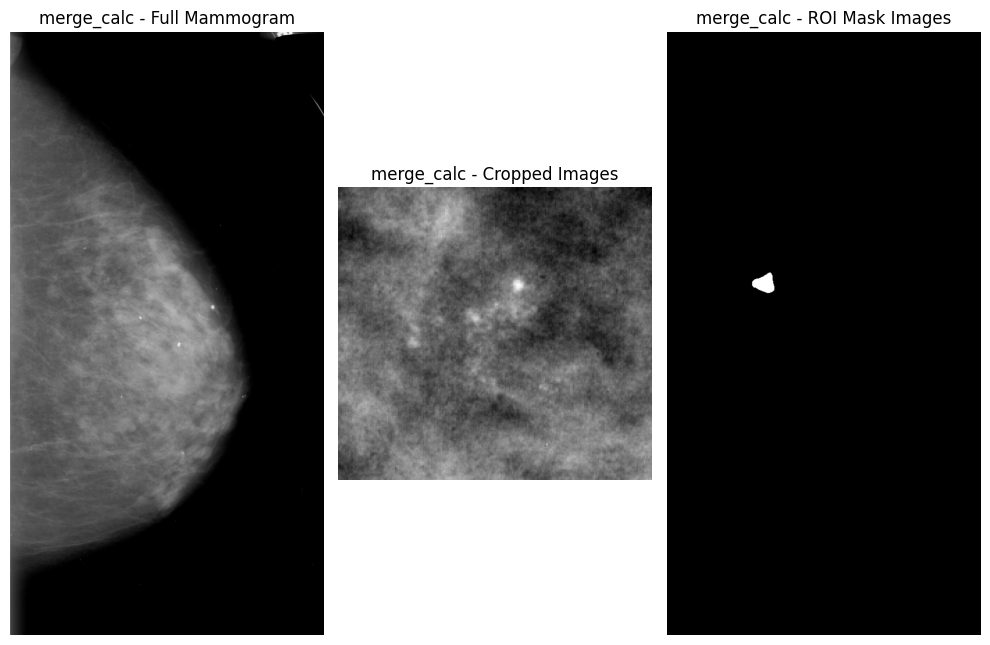

Plotting images for merge_mass.....


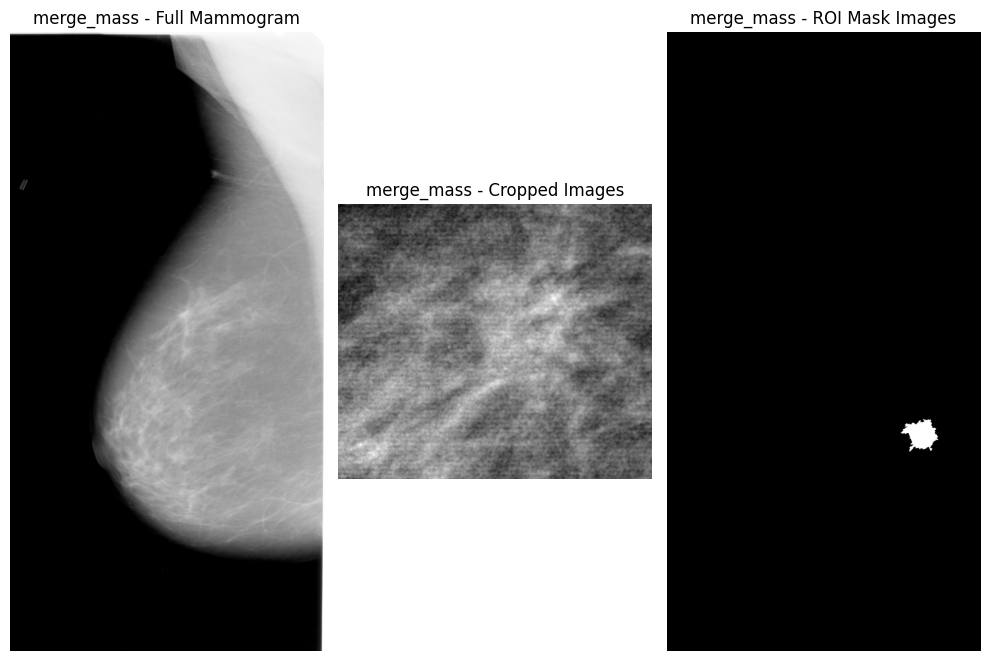

In [ ]:
def plot_sample_images(dataset, dataset_name):
  plt.figure(figsize=(10, 10))
  types = [
      ('image_file_path', 'Full Mammogram'),
      ('cropped_image_file_path', 'Cropped Images'),
      ('roi_mask_file_path', 'ROI Mask Images')
  ]

  for idx, (column, title) in enumerate(types):
    if column in dataset.columns and dataset[column].notna().any():
      sample_path = dataset[column].dropna().iloc[0]
      image = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

      if image is not None:
        plt.subplot(1, 3, idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{dataset_name} - {title}")
        plt.axis('off')
      else:
        print(f"Failed to load image for {title} in {dataset_name}, Path: {sample_path}")
    else:
      print(f"No valid paths found for {title} in {dataset_name}")

  plt.tight_layout()
  plt.show()

datasets_to_plot = {
    "merge_calc": merge_calc,
    "merge_mass": merge_mass
}

for dataset_name, dataset in datasets_to_plot.items():
  print(f"Plotting images for {dataset_name}.....")
  plot_sample_images(dataset, dataset_name)



### Structured Data Feature Engineering

We can start with the merged mass set

In [ ]:
merge_mass.image_file_path, merge_calc.image_file_path

(0       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 1       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 2       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 3       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 4       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
                               ...                        
 4979    /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 4980    /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 4981    /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 4982    /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 4983    /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 Name: image_file_path, Length: 4984, dtype: object,
 0       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 1       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 2       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 3       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
 4       /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....
   

`Pathology` is the target column for both sets, we can convert the categorical features

In [ ]:
merge_mass.head()

file_path patient_id  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10068...    P_00281   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10090...    P_01423   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10098...    P_00106   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10130...    P_01232   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.10130...    P_01232   

   breast_density left_or_right_breast image_view  abnormality_id  \
0               3                 LEFT        MLO               1   
1               2                RIGHT         CC               1   
2               1                RIGHT        MLO               1   
3               2                RIGHT         CC               1   
4               2                RIGHT         CC               1   

  abnormality_type                mass_shape    mass_margin  assessment  ...  \
0             mass  ARCHITECTURAL_DISTORTION    ILL_DEFINED           4  ...   
1             mass                      OVAL    ILL_DEFINED           0  ...   
2             mass                LYMPH_NODE  CIRCUMSCRIBED           2  ...   
3             mass                 IRREGULAR     SPICULATED           5  ...   
4             mass                 IRREGULAR     SPICULATED           5  ...   

  subtlety                                    image_file_path  \
0        2  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
1        5  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
2        4  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
3        5  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
4        5  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   

                             cropped_image_file_path  \
0  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
1  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
2  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
3  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
4  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   

                                  roi_mask_file_path  \
0  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
1  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
2  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
3  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   
4  /content/drive/MyDrive/CBIS-DDSM/jpeg/1.3.6.1....   

                                   SeriesInstanceUID ImageCount  \
0  1.3.6.1.4.1.9590.100.1.2.100682860911308271813...          1   
1  1.3.6.1.4.1.9590.100.1.2.100905990410891350726...          1   
2  1.3.6.1.4.1.9590.100.1.2.100980939123382399014...          1   
3  1.3.6.1.4.1.9590.100.1.2.101302820113690396725...          2   
4  1.3.6.1.4.1.9590.100.1.2.101302820113690396725...          2   

                                          image_path      SeriesDescription  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100682...  full mammogram images   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100905...        ROI mask images   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.100980...  full mammogram images   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.101302...        ROI mask images   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.101302...        ROI mask images   

                                    StudyInstanceUID BodyPartExamined  
0  1.3.6.1.4.1.9590.100.1.2.306790226913702749912...           BREAST  
1  1.3.6.1.4.1.9590.100.1.2.135084625711370131300...           BREAST  
2  1.3.6.1.4.1.9590.100.1.2.322966358810778548708...           BREAST  
3  1.3.6.1.4.1.9590.100.1.2.364339114411242938621...           BREAST  
4  1.3.6.1.4.1.9590.100.1.2.364339114411242938621...           BREAST  

[5 rows x 21 columns]

In [ ]:
# image_constants
FULL_IMG = "image_file_path"
CROPPED_IMG = "cropped_image_file_path"
ROI_IMG = "roi_mask_file_path"

In [ ]:
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}
target_size = (224, 224, 3)

In [ ]:
def extract_features(df, df_type="mass"):
    columns_to_remove = ['StudyInstanceUID', 'patient_id','SeriesInstanceUID']
    df = df.drop(columns=columns_to_remove, errors='ignore')

    # numerical variables are ordinal, so I'll keep them as they are
    categorical_columns_to_dummy = [
        col for col in df.columns
        if df[col].nunique() < 50 and df[col].dtype in ['object', 'category'] and col != 'pathology'
    ]
    df = pd.get_dummies(df, columns=categorical_columns_to_dummy, drop_first=True)

    print(f"Dataset info: {df_type}")
    display(merge_calc.info())
    print("-" * 50)

    df['labels'] = df['pathology'].replace(class_mapper).infer_objects(copy=False)

    def get_images_by_type(df, image_type):
        #print(image_type)
        valid_rows = df[df[image_type].notna()]
        #print(valid_rows.shape)
        return np.array(valid_rows[image_type].tolist()), np.array(valid_rows["labels"].tolist())

    # Collect data by image tyoe in dict
    merged_dict = {
        FULL_IMG: get_images_by_type(df, FULL_IMG),
        CROPPED_IMG: get_images_by_type(df, CROPPED_IMG),
        ROI_IMG: get_images_by_type(df, ROI_IMG)
    }

    # Print stats
    print("Images counts by type")
    print(f"Full images in {df_type} dataset: {len(merged_dict[FULL_IMG][0])}, {len(merged_dict[FULL_IMG][1])}")
    print(f"Cropped images in {df_type} dataset: {len(merged_dict[CROPPED_IMG][0])}, {len(merged_dict[CROPPED_IMG][1])}")
    print(f"ROI images in {df_type} dataset: {len(merged_dict[ROI_IMG][0])}, {len(merged_dict[ROI_IMG][1])}")

    merged_labels = np.concatenate((merged_dict[FULL_IMG][1], merged_dict[CROPPED_IMG][1], merged_dict[ROI_IMG][1]))
    print(f"Total number of images in {df_type} dataset: {len(merged_labels)}")
    print("-" * 50)

    merged_labels_series = pd.Series(merged_labels)

    # Count the occurrences of each class
    label_counts = merged_labels_series.value_counts()

    # Assuming 0 = benign and 1 = malignant
    benign_count = label_counts.get(0, 0)
    malignant_count = label_counts.get(1, 0)

    print(f"Benign images in {df_type} dataset: {benign_count}")
    print(f"Malignant images in {df_type} dataset: {malignant_count}")

    return merged_dict, merged_labels

In [ ]:
merge_mass_dict, merge_mass_labels = extract_features(merge_mass, df_type="mass")
print("=" * 50)
merge_calc_dict, merge_calc_labels = extract_features(merge_calc, df_type="calc")

Dataset info: mass
<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 0 to 4637
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4316 non-null   object
 1   patient_id               4316 non-null   object
 2   breast_density           4316 non-null   int64 
 3   left_or_right_breast     4316 non-null   object
 4   image_view               4316 non-null   object
 5   abnormality_id           4316 non-null   int64 
 6   abnormality_type         4316 non-null   object
 7   calc_type                4268 non-null   object
 8   calc_distribution        3367 non-null   object
 9   assessment               4316 non-null   int64 
 10  pathology                4316 non-null   object
 11  subtlety                 4316 non-null   int64 
 12  image_file_path          4316 non-null   object
 13  cropped_image_file_path  4316 non-null   object
 14  roi_mask_file_path       4

None

--------------------------------------------------
Images counts by type
Full images in mass dataset: 4984, 4984
Cropped images in mass dataset: 4984, 4984
ROI images in mass dataset: 4984, 4984
Total number of images in mass dataset: 14952
--------------------------------------------------
Benign images in mass dataset: 8028
Malignant images in mass dataset: 6924
Dataset info: calc
<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 0 to 4637
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4316 non-null   object
 1   patient_id               4316 non-null   object
 2   breast_density           4316 non-null   int64 
 3   left_or_right_breast     4316 non-null   object
 4   image_view               4316 non-null   object
 5   abnormality_id           4316 non-null   int64 
 6   abnormality_type         4316 non-null   object
 7   calc_type                4268 

None

--------------------------------------------------
Images counts by type
Full images in calc dataset: 4316, 4316
Cropped images in calc dataset: 4316, 4316
ROI images in calc dataset: 4316, 4316
Total number of images in calc dataset: 12948
--------------------------------------------------
Benign images in calc dataset: 8166
Malignant images in calc dataset: 4782


In [ ]:
# # mass set
# merge_mass = merge_mass.drop(columns=['patient_id', 'SeriesInstanceUID', 'StudyInstanceUID'])
# # calc set
# merge_calc = merge_calc.drop(columns=['patient_id', 'SeriesInstanceUID', 'StudyInstanceUID'])

In [ ]:
# def encode_and_convert_to_int(df, column, prefix):
#   df = pd.concat([df, pd.get_dummies(df[column], prefix=prefix)], axis=1)
#   df.drop(column, axis=1, inplace=True)
#   dummy_cols = [col for col in df.columns if col.startswith(prefix)]
#   df[dummy_cols] = df[dummy_cols].astype(int)
#   return df

# merge_mass = encode_and_convert_to_int(merge_mass, 'pathology', 'pathology')
# merge_calc = encode_and_convert_to_int(merge_calc, 'pathology', 'pathology')

In [ ]:
merge_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4316 entries, 0 to 4637
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4316 non-null   object
 1   patient_id               4316 non-null   object
 2   breast_density           4316 non-null   int64 
 3   left_or_right_breast     4316 non-null   object
 4   image_view               4316 non-null   object
 5   abnormality_id           4316 non-null   int64 
 6   abnormality_type         4316 non-null   object
 7   calc_type                4268 non-null   object
 8   calc_distribution        3367 non-null   object
 9   assessment               4316 non-null   int64 
 10  pathology                4316 non-null   object
 11  subtlety                 4316 non-null   int64 
 12  image_file_path          4316 non-null   object
 13  cropped_image_file_path  4316 non-null   object
 14  roi_mask_file_path       4316 non-null   obje

In [ ]:
# save the csv file
merge_mass.to_csv('/content/drive/MyDrive/CBIS-DDSM/merge_mass.csv', index=False)

In [ ]:
merge_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   file_path                4984 non-null   object
 1   patient_id               4984 non-null   object
 2   breast_density           4984 non-null   int64 
 3   left_or_right_breast     4984 non-null   object
 4   image_view               4984 non-null   object
 5   abnormality_id           4984 non-null   int64 
 6   abnormality_type         4984 non-null   object
 7   mass_shape               4974 non-null   object
 8   mass_margin              4814 non-null   object
 9   assessment               4984 non-null   int64 
 10  pathology                4984 non-null   object
 11  subtlety                 4984 non-null   int64 
 12  image_file_path          4984 non-null   object
 13  cropped_image_file_path  4984 non-null   object
 14  roi_mask_file_path       4984 non-null  

### Image Preprocessing

In [ ]:
# full mammogram images preprocessing

# visualize image
# image_path = merge_mass.image_file_path.iloc[0]
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# print(image.shape)
# plt.imshow(image, cmap='gray')
# plt.axis('off')
# plt.show()

# dynamically visualize all images
def visualize_image(image_path):
  """Visualizes an image using matplotlib.

  Args:
    image_path: The path to the image file.

  """
  try:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
      raise ValueError(f"Failed to load image from {image_path}")

    # Check if the image data type is object and convert if necessary
    if image.dtype == object:
      # Attempt to convert the object data type to a numerical type
      image = image.astype(np.float32)

    plt.imshow(image, cmap='gray')
    plt.title(image_path)
    plt.axis('off')
    plt.show()
  except Exception as e:
    print(f"Error visualizing image: {e}")

In [ ]:
# check more images features using cv2
# image = np.load(image_path)

# visualize the three channels
def visualize_image_channels(image_path):
  image = np.load(image_path)

  main_image = image[:, :, 0]
  edges = image[:, :, 1]
  gradient = image[:, :, 2]

  plt.figure(figsize=(15, 5))

  # main image
  plt.subplot(1, 3, 1)
  plt.imshow(main_image, cmap='gray')
  plt.title('Main Image')
  plt.axis('off')

  # edges
  plt.subplot(1, 3, 2)
  plt.imshow(edges, cmap='gray')
  plt.title('Edges')
  plt.axis('off')

  # gradient
  plt.subplot(1, 3, 3)
  plt.imshow(gradient, cmap='gray')
  plt.title('Gradient Magnitude')
  plt.axis('off')

  plt.tight_layout()
  plt.show()


In [ ]:
def visualize_detected_patch(full_image, cropped_image,
                             coordinates, scale):
  h, w = cropped_image.shape
  scaled_cropped_image = cv2.resize(cropped_image, None,
                                    fx=scale, fy=scale,
                                    interpolation=cv2.INTER_LINEAR)

  # coordinates
  x, y = coordinates
  h, w = scaled_cropped_image.shape

  # plot full images with matched region highlighted
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.title("Detected Region on Full Image")
  plt.imshow(full_image, cmap='gray')
  plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red',
                                    facecolor='none',
                                    lw=2))
  plt.axis('off')

  # plot cropped images
  plt.subplot(1, 2, 2)
  plt.title("Detected Region on Cropped Image")
  plt.imshow(cropped_image, cmap='gray')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
def visualize_samples_from_df(df, idx=0):
  visualize_image(df[FULL_IMG][0][idx])
  visualize_image(df[CROPPED_IMG][0][idx])
  visualize_image(df[ROI_IMG][0][idx])

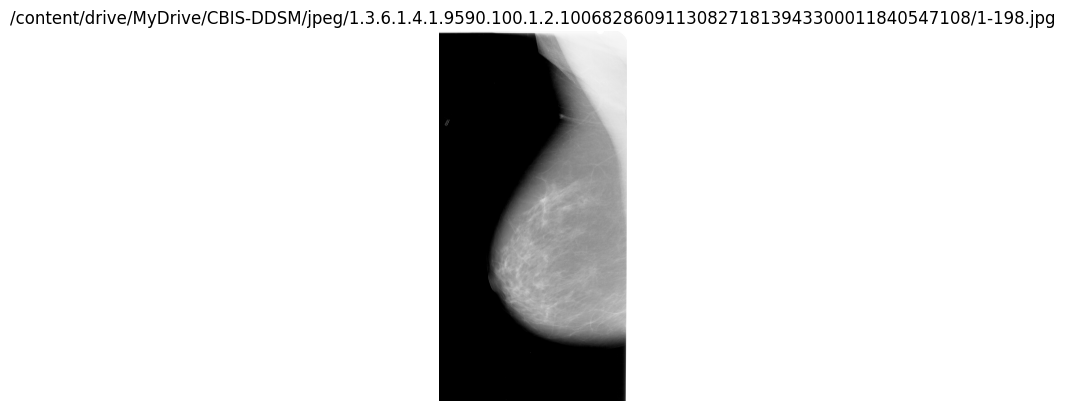

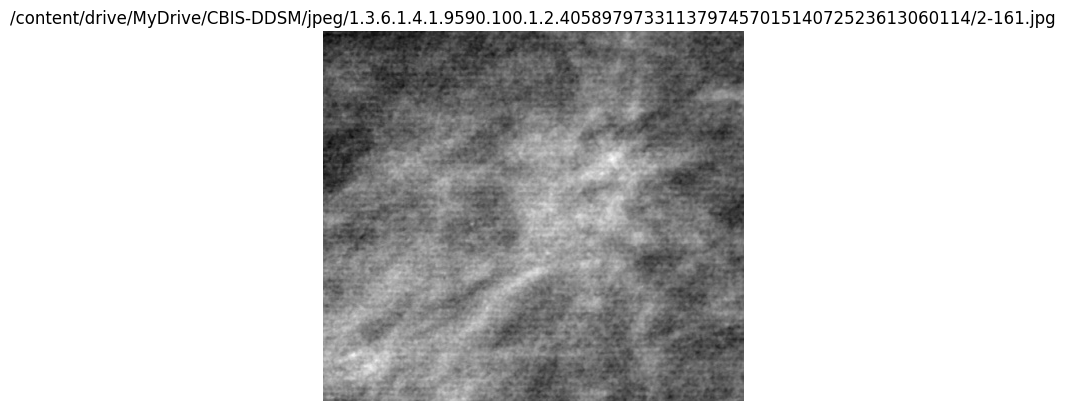

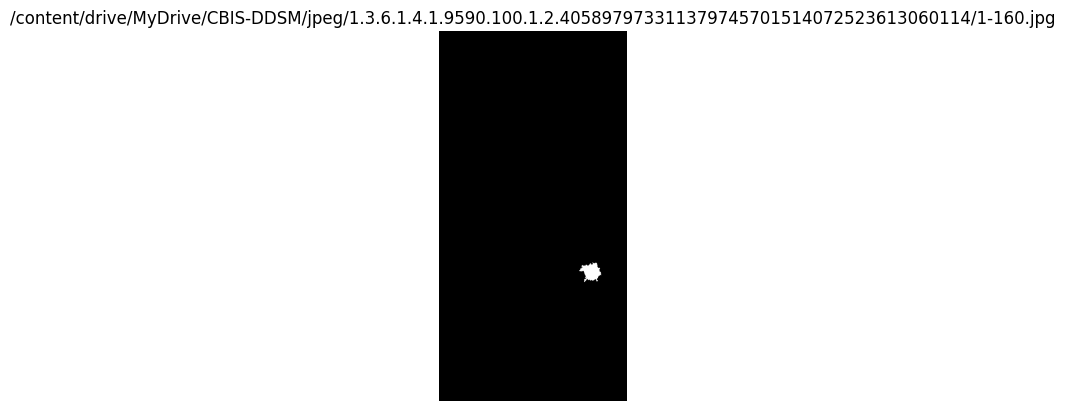

In [ ]:
visualize_samples_from_df(merge_mass_dict, idx=0)

Things that need to be done on the full mammograms

* current shape is (6256, 3166)
* resized to (224, 224)
* apply corner masks
* apply noise reduction
* enhance contrast
* calculate magnitude gradient
* stack image features into 3 channels
* determine orientation

In [ ]:
from tqdm import tqdm
import random
from skimage.feature import local_binary_pattern
from skimage.exposure import adjust_gamma, equalize_hist
import time
import shutil

In [ ]:
def adjust_contrast(full_image, gamma=1.5):
  # gamma correction
  gamma_corrected = adjust_gamma(full_image, gamma=gamma)

  # histogram equalization
  equalized = equalize_hist(gamma_corrected)

  # convert equalized image back to uint8
  equalized_to_uint8 = (equalized * 255).astype(np.uint8)

  return equalized_to_uint8

In [ ]:
def determine_breast_orientation(image):
  h, w = image.shape
  mid = w // 2

  # sum pixel intensities in left and right regions
  left_sum = np.sum(image[:, :mid])
  right_sum = np.sum(image[:, mid:])

  if left_sum > right_sum:
    return 'left'
  else:
    return 'right'

In [ ]:
def apply_corner_masks(image, mask_ratio=0.2):
  h, w = image.shape
  mask = np.ones((h, w), dtype=np.uint8)

  # define mask dimension
  mask_width = int(w * mask_ratio)
  mask_height = int(h * mask_ratio)

  # Mask the top_right corner
  mask[:mask_height, w - mask_width:] = 0
  # Mask the bottom-right corner
  mask[h - mask_height:, w - mask_width] = 0

  # Apply the mask to the image
  masked_image = cv2.bitwise_and(image, image, mask=mask)


  return masked_image

In [ ]:
def get_3channel_image(image, mask_ratio=0.2):
  orientation = determine_breast_orientation(image)
  if orientation == 'right':
    image = cv2.flip(image, 1)

  image_masked = apply_corner_masks(image, mask_ratio=mask_ratio)

  image_resized = cv2.resize(image_masked, (224, 224),
                             interpolation=cv2.INTER_AREA)

  image_main = adjust_contrast(image_resized, gamma=1.5)

  normalized_image = cv2.normalize(image_main, None,
                                   alpha=0, beta=255,
                                   norm_type=cv2.NORM_MINMAX)
  normalized_image = normalized_image.astype(np.uint8)

  # apply heatmap
  heatmap = cv2.applyColorMap(normalized_image, cv2.COLORMAP_JET)
  heatmap_grayscale = cv2.cvtColor(heatmap, cv2.COLOR_BGR2GRAY)

  # gradient magnitude
  dx = cv2.Sobel(image_main, cv2.CV_64F, 1, 0, ksize=3)
  dy = cv2.Sobel(image_main, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude = np.sqrt(dx**2 + dy**2).astype(np.uint8)
  combined = cv2.addWeighted(image_main, 0.7, gradient_magnitude,
                             0.3, 0)
  combined_image = np.stack([image_main, heatmap_grayscale,
                             combined], axis=1)
  combined_image = combined_image / 255.0

  return combined_image


In [ ]:
def preprocess_full_image(image_path, label, target_size=(224, 224), base_path="preprocessed_dataset", mask_ratio=0.2, is_originaly_full=True):

    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            raise ValueError(f"Image not found or unreadable: {image_path}")

        combined_image = get_3channel_image(image)

        # Use the original image path structure for naming
        unique_id = random.randint(10000, 99999)
        relative_path = os.path.relpath(image_path, start='/content/drive/MyDrive/CBIS-DDSM/')
        relative_path_no_ext = relative_path.replace('/', '_').replace('\\', '_')
        output_path = os.path.join(base_path, f"{relative_path_no_ext}_{label}_preprocessed_{unique_id}.npy")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save the preprocessed image
        np.save(output_path, combined_image)
        return output_path  # Return output path for later retrieval

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return f"Error processing {image_path}: {e}"


def preprocess_full_sample(df, idx=0):
  image_path = df[FULL_IMG][0][idx]
  image_label = df[FULL_IMG][1][idx]

  preprocesses_image_3channel = preprocess_full_image(image_path, image_label)

  if preprocesses_image_3channel is not None:
    visualize_image(image_path)
    visualize_image_channels(preprocesses_image_3channel)
  else:
    print(f"Failed to preprocess {image_path}")

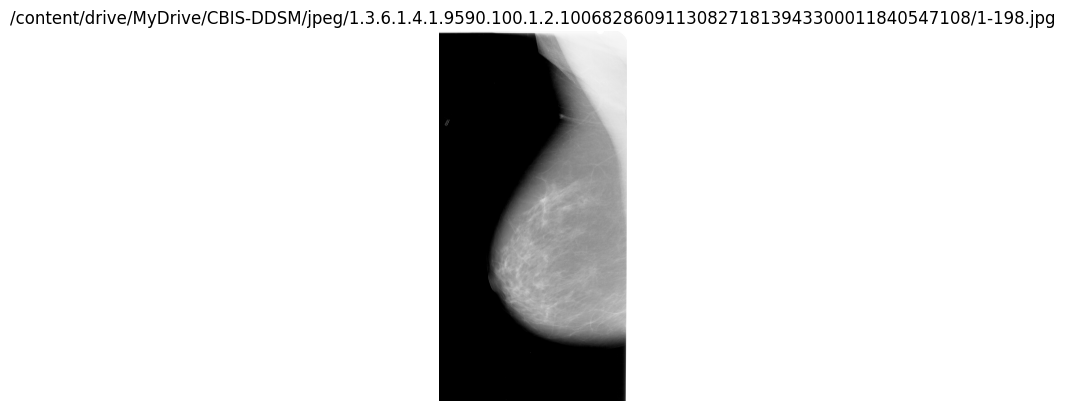

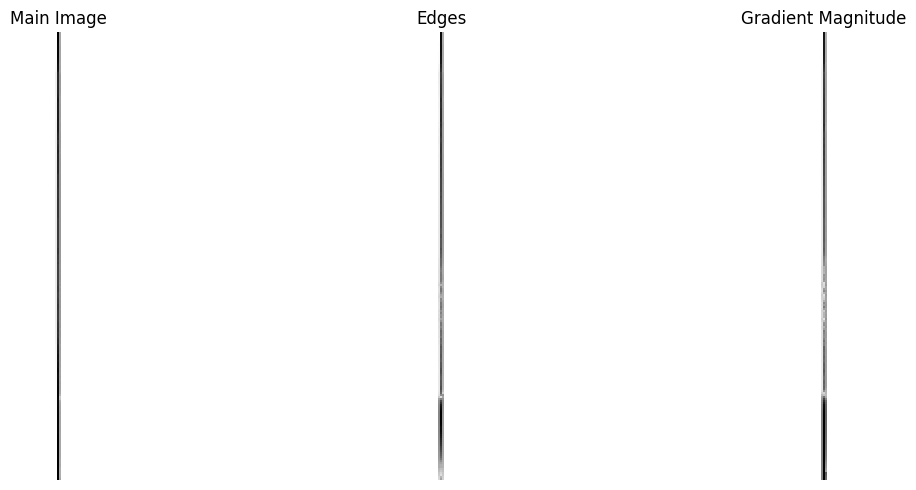

In [ ]:
preprocess_full_sample(merge_mass_dict, idx=0)

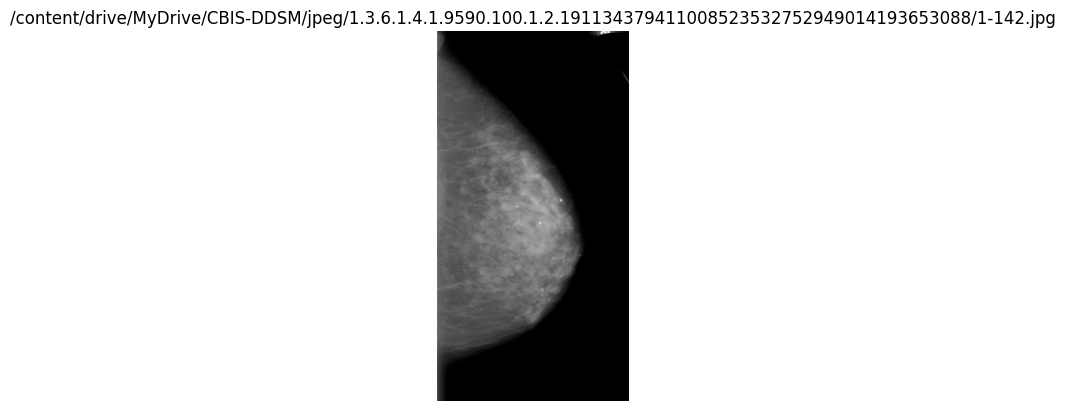

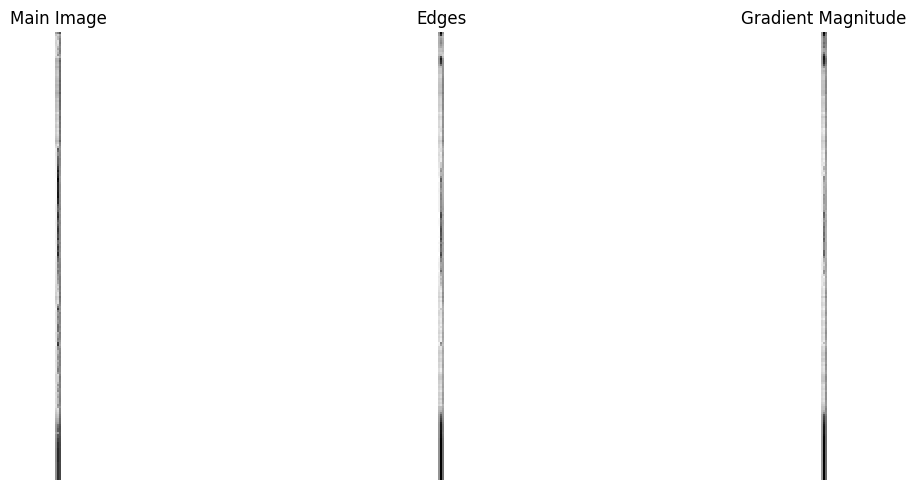

In [ ]:
preprocess_full_sample(merge_calc_dict, idx=0)

### Data Augmentation

In [ ]:
def overlay_roi_on_full(full_path, roi_path, gamma=1.5,
                        edge_thickness=2, edge_color=(255, 255, 255),
                        enable_visualization=True):
  full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE),
                               gamma=gamma)
  roi_image = cv2.imread(roi_path, cv2.IMREAD_GRAYSCALE)

  print(f"Full image shape: {full_image.shape}")
  print(f"ROI image shape: {roi_image.shape}")

  roi_mask = roi_image.astype(np.uint8)
  roi_mask_binary = (roi_mask > 0).astype(np.uint8)

  if roi_mask.shape != full_image.shape:
    roi_mask_binary = cv2.resize(roi_mask_binary, (full_image.shape[1],
                                 full_image.shape[0]), interpolation=cv2.INTER_NEAREST)

  # find contours
  contours, _ = cv2.findContours(roi_mask_binary, cv2.RETR_EXTERNAL,
                                 cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) == 0:
    raise ValueError("No mass found in the ROI mask")

  largest_contour = max(contours, key=cv2.contourArea)
  x, y, w, h = cv2.boundingRect(largest_contour)

  overlay_image = full_image.copy()

  # draw contours
  cv2.drawContours(overlay_image, [largest_contour],
                   -1, edge_color, thickness=edge_thickness)

  if enable_visualization:
    plt.imshow(overlay_image, cmap='gray')
    plt.title("Accurate ROI Overlay on Full Mammogram")
    plt.axis('off')
    plt.show()

  coordinates = (x, y)

  return overlay_image, coordinates

Full image shape: (5281, 3226)
ROI image shape: (4595, 2807)


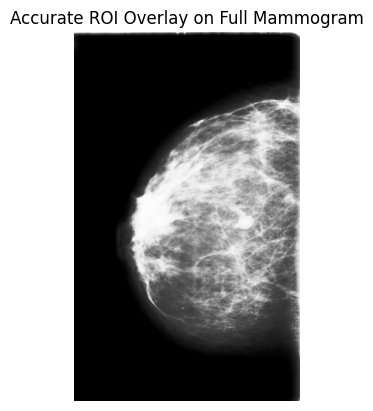

In [ ]:
image, coordinates = overlay_roi_on_full(merge_mass_dict[FULL_IMG][0][1],
                                         merge_mass_dict[ROI_IMG][0][1],
                                         gamma=1.5)

In [ ]:
def random_geometric_transformation(roi_mask, shift_range=20,
                                    scale_range=(0.8, 1.2), rotation_range=15):
  h, w = roi_mask.shape[:2]

  tx = random.randint(-shift_range, shift_range)
  ty = random.randint(-shift_range, shift_range)
  translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
  roi_mask_translated = cv2.warpAffine(roi_mask, translation_matrix, (w, h))

  # random_scale
  scale_factor = random.uniform(*scale_range)
  scaled_width = int(w * scale_factor)
  scaled_height = int(h * scale_factor)
  roi_scaled = cv2.resize(roi_mask_translated, (scaled_width, scaled_height),
                        interpolation=cv2.INTER_NEAREST)

  # random rotation
  padded_roi = np.zeros_like(roi_mask, dtype=np.uint8)
  start_x = max((roi_mask.shape[1] - roi_scaled.shape[1]) // 2, 0)
  start_y = max((roi_mask.shape[0] - roi_scaled.shape[0]) // 2, 0)
  end_x = start_x + roi_scaled.shape[1]
  end_y = start_y + roi_scaled.shape[0]

  end_x = min(end_x, w)
  end_y = min(end_y, h)
  padded_roi[start_y:end_y, start_x:end_x] = roi_scaled[: end_y - start_y, : end_x - start_x]

  # random rotation
  rotation_angle = random.uniform(-rotation_range, rotation_range)
  rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), rotation_angle, 1)
  roi_rotated = cv2.getRotationMatrix2D((w // 2, h // 2), rotation_angle, 1.0)
  roi_rotated = cv2.warpAffine(padded_roi, rotation_matrix, (w, h))

  return roi_rotated

In [ ]:
def overlay_roi_on_full_with_transform(
    full_path, roi_path, gamma=1.5, edge_thickness=2, edge_color=(255, 255, 255),
    shift_range=20, scale_range=(0.8, 1.2), rotation_range=15, enable_visualization=True
):
    """
    Overlay a randomly transformed ROI mask on the full mammogram image.
    """
    # Load the full image and ROI mask
    full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)
    roi_mask = cv2.imread(roi_path, cv2.IMREAD_GRAYSCALE)

    print(f"Full image shape: {full_image.shape}")
    print(f"ROI shape: {roi_mask.shape}")

    # Ensure the ROI mask is binary (0 or 1)
    roi_mask = roi_mask.astype(np.uint8)
    roi_mask_binary = (roi_mask > 0).astype(np.uint8)

    # Rescale the ROI mask to match full image dimension
    if roi_mask.shape != full_image.shape:
        roi_mask_binary = cv2.resize(roi_mask_binary, (full_image.shape[1], full_image.shape[0]),
                                     interpolation=cv2.INTER_NEAREST)

    # apply geometric tranformation
    transformed_roi_mask = random_geometric_transformation(roi_mask_binary,
                                                          shift_range=shift_range,
                                                          scale_range=scale_range,
                                                          rotation_range=rotation_range)

    # find contours
    contours, _ = cv2.findContours(transformed_roi_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        raise ValueError("No mass found in the transformed ROI mask.")

    largest_contour = max(contours, key=cv2.contourArea)

    overlay_image = full_image.copy()

    # Draw the contour
    cv2.drawContours(overlay_image, [largest_contour], -1, 255, thickness=-1)  # Fill with white

    # Draw edges
    cv2.drawContours(overlay_image, [largest_contour], -1, edge_color, thickness=edge_thickness)

    # Display the result
    if enable_visualization:
        plt.imshow(overlay_image, cmap='gray')
        plt.title("Transformed ROI Overlay on Full Mammogram")
        plt.axis("off")
        plt.show()

    return overlay_image


Full image shape: (5281, 3226)
ROI shape: (4595, 2807)


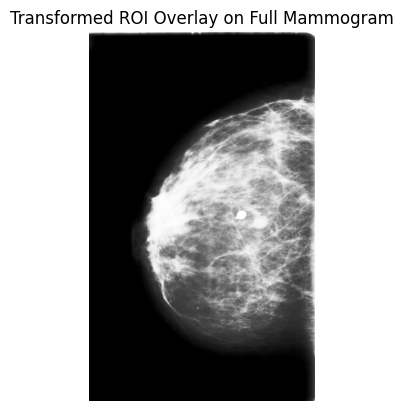

In [ ]:
overlay_image = overlay_roi_on_full_with_transform(merge_mass_dict[FULL_IMG][0][1],
                                                   merge_mass_dict[ROI_IMG][0][1],
                                                   gamma=1.5, edge_thickness=3,
                                                   shift_range=30, scale_range=(0.5, 1.5),
                                                   rotation_range=10)

In [ ]:
# overlay cropped images
def overlay_cropped_on_full(
    full_path, cropped_path,
    coordinates, gamma=1.5,
    max_rotation_range=15,
    max_scale_range=(0.8, 1.2),
    max_shift_range=30,
    alpha=0.8, beta=0.2,
    enable_visualization=True):
  full_image = adjust_contrast(cv2.imread(full_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)
  cropped_image = adjust_contrast(cv2.imread(cropped_path, cv2.IMREAD_GRAYSCALE), gamma=gamma)

  if full_image is None or cropped_image is None:
    raise ValueError("One of the input images could not be loaded")

  # Random Scaling
  scale_factor = random.uniform(*max_scale_range)
  new_width = int(cropped_image.shape[1] * scale_factor)
  new_height = int(cropped_image.shape[0] * scale_factor)
  cropped_image_rescaled = cv2.resize(cropped_image, (new_width, new_height),
                             interpolation=cv2.INTER_AREA)

  # random rotation
  center = (cropped_image_rescaled.shape[1] // 2, cropped_image_rescaled.shape[0] // 2)
  angle = random.uniform(-max_rotation_range, max_rotation_range)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  cropped_image_rotated = cv2.warpAffine(cropped_image_rescaled, rotation_matrix,
                                         (new_width, new_height),
                                         flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT,
                                         borderValue=0)
  # random shifting
  shift_x = random.randint(-max_shift_range, max_shift_range)
  shift_y = random.randint(-max_shift_range, max_shift_range)

  x, y = coordinates
  x += shift_x
  y += shift_y

  end_x = min(x + cropped_image_rotated.shape[1], full_image.shape[1])
  end_y = min(y + cropped_image_rotated.shape[0], full_image.shape[0])
  start_x = max(x, 0)
  start_y = max(y, 0)

  trimmed_width = end_x - start_x
  trimmed_height = end_y - start_y
  cropped_image_trimmed = cropped_image_rotated[:trimmed_height, :trimmed_width]

  # extract target region
  target_region = full_image[start_y:end_y, start_x:end_x]

  target_mean = np.mean(target_region)
  cropped_mean = np.mean(cropped_image_trimmed)

  if cropped_mean > 0:
    cropped_image_trimmed = (cropped_image_trimmed.astype(np.float32) * (target_mean / cropped_mean)).clip(0, 255).astype(np.uint8)

  # blend image
  blended_image = full_image.copy()
  blended_region = cv2.addWeighted(
      target_region, alpha, cropped_image_trimmed, beta, 0
  )

  # display result
  if enable_visualization:
    plt.imshow(blended_image, cmap='gray')
    plt.title("Transformed Cropped Overlay on Full Image")
    plt.axis("off")

  return blended_image


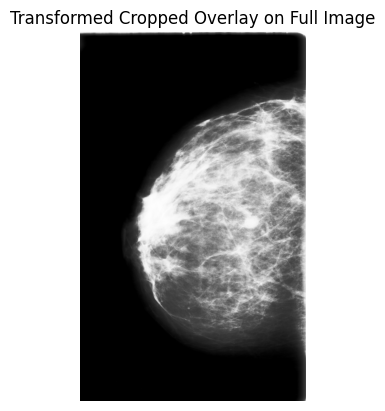

In [ ]:
blended_image = overlay_cropped_on_full(
    full_path=merge_mass_dict[FULL_IMG][0][1],
    cropped_path=merge_mass_dict[CROPPED_IMG][0][1],
    gamma=1.5, coordinates=coordinates, max_rotation_range=15,
    max_scale_range=(0.5, 1.5),
    max_shift_range=50,
    alpha=0.8, beta=0.2
)

In [ ]:
# preprocess full dataset
def preprocess_dataset(image_paths, labels, base_path,
                       target_size=(224, 224), mask_ratio=0.2):
  print("Preprocessing data sequentially")
  error_count = 0
  processed_files = []

  assert len(image_paths) == len(labels), "Mismatch in the number of images and labels"

  for image_path, label in tqdm(zip(image_paths, labels), total=len(image_paths)):
    res = preprocess_full_image(image_path, label, target_size=target_size,
                                base_path=base_path, mask_ratio=mask_ratio)
    if "Error" in res:
      error_count += 1
      print(res)
    else:
      processed_files.append(res)

  print(f"Preprocessed images saved in {base_path}")
  print(f"Number of errors during processing: {error_count}")
  print(f"Total processed files: {len(processed_files)}")

  return processed_files

In [ ]:
base_path = '/content/drive/MyDrive/CBIS-DDSM/preprocessed_images'
target_size = (224, 224)

In [ ]:
preprocess_dataset(
    image_paths=merge_mass_dict[FULL_IMG][0],
    labels=merge_mass_dict[FULL_IMG][1],
    base_path=base_path,
    target_size=target_size
)

print("Preprocessing complete", base_path)

Preprocessing data sequentially


100%|██████████| 4984/4984 [31:15<00:00,  2.66it/s]

Preprocessed images saved in /content/drive/MyDrive/CBIS-DDSM/preprocessed_images
Number of errors during processing: 0
Total processed files: 4984
Preprocessing complete /content/drive/MyDrive/CBIS-DDSM/preprocessed_images


In [ ]:
def data_augmentation(df, output_dir,
                      initial_idx=0):
  full_paths, full_labels = df[FULL_IMG]
  roi_paths, roi_labels = df[ROI_IMG]
  cropped_paths, cropped_labels = df[CROPPED_IMG]

  processed_files = []
  augmentation_tracker = []
  error_count = 0

  os.makedirs(output_dir, exist_ok=True)

  for idx in tqdm(range(initial_idx, len(full_paths)), desc='Augmentation Progress'):
    image_label = full_labels[idx]
    index_tracker = {'index': idx,
                     'strategies': []}
    coordinates = None

    try:
      strategy_1_start = time.time()
      strategy_1_status = {'strategy': 'Strategy 1',
                           'status': 'Failed',
                           'error': None, 'time': None}
      try:
        overlay_image1, coordinates = overlay_roi_on_full(full_path=full_paths[idx],
                                                          roi_path=roi_paths[idx], # Corrected variable name
                                                          gamma=1.5,
                                                          enable_visualization=False)
        augment_image1 = get_3channel_image(overlay_image1)
        output_path1 = os.path.join(output_dir, f"augmented_strategy1_{idx}.npy")
        np.save(output_path1, augment_image1)
        processed_files.append(output_path1)
        strategy_1_status['status'] = 'Success'

      except Exception as e:
        strategy_1_status['error'] = str(e)
        error_count += 1
      finally:
        strategy_1_status['time'] = round(time.time() - strategy_1_start, 3)
        index_tracker['strategies'].append(strategy_1_status)

      strategy_2_start = time.time()
      strategy_2_status = {'strategy': 'Strategy 2',
                           'status': 'Failed',
                           'error': None, 'time': None}
      try:
        overlay_image2 = overlay_roi_on_full_with_transform(
            full_path=full_paths[idx],
            roi_path=roi_paths[idx],
            gamma=1.5, edge_thickness=3,
            shift_range=30, scale_range=(0.5, 1.5),
            rotation_range=10, enable_visualization=False
        )
        augment_image2 = get_3channel_image(overlay_image2)
        output_path2 = os.path.join(output_dir, f"augmented_strategy2_{idx}.npy")
        np.save(output_path2, augment_image2)
        processed_files.append(output_path2)
        strategy_2_status['status'] = 'Success'

      except Exception as e:
        strategy_2_status['error'] = str(e)
        error_count += 1
      finally:
        strategy_2_status['time'] = round(time.time() - strategy_2_start, 3)
        index_tracker['strategies'].append(strategy_2_status)

      strategy_3_start = time.time()
      strategy_3_status = {'strategy': 'Strategy 3',
                           'status': 'Skipped',
                           'error': None, 'time': None}
      if coordinates is not None:
          try:
            blended_image = overlay_cropped_on_full(
                full_path=full_paths[idx],
                cropped_path=cropped_paths[idx],
                gamma=1.5, coordinates=coordinates, max_rotation_range=15,
                max_scale_range=(0.5, 1.5),
                max_shift_range=50,
                alpha=0.8, beta=0.2, enable_visualization=False
            )
            augment_image3 = get_3channel_image(blended_image)
            output_path3 = os.path.join(output_dir, f"augmented_strategy3_{idx}.npy")
            np.save(output_path3, augment_image3)
            processed_files.append(output_path3)
            strategy_3_status['status'] = 'Success'

          except Exception as e:
            strategy_3_status['error'] = str(e)
            error_count += 1
          finally:
            strategy_3_status['time'] = round(time.time() - strategy_3_start, 3)
            index_tracker['strategies'].append(strategy_3_status)

      augmentation_tracker.append(index_tracker)

    except Exception as e:
      print(f'Unexpected error at index {idx}: {str(e)}')
      error_count += 1

  print("Data Augmentation Completed")
  print(f"Number of errors during augmentation: {error_count}")
  print(f"Total processed files: {len(processed_files)}")

  return processed_files, augmentation_tracker


In [ ]:
output_dir = '/content/drive/MyDrive/CBIS-DDSM/augmented_images'
data_augmentation(merge_mass_dict, output_dir, initial_idx=4983)

Augmentation Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Full image shape: (4512, 2984)
ROI image shape: (4512, 2984)
Full image shape: (4512, 2984)
ROI shape: (4512, 2984)


Augmentation Progress: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

Data Augmentation Completed
Number of errors during augmentation: 0
Total processed files: 3


(['/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy1_4983.npy',
  '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy2_4983.npy',
  '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_4983.npy'],
 [{'index': 4983,
   'strategies': [{'strategy': 'Strategy 1',
     'status': 'Success',
     'error': None,
     'time': 1.431},
    {'strategy': 'Strategy 2',
     'status': 'Success',
     'error': None,
     'time': 0.963},
    {'strategy': 'Strategy 3',
     'status': 'Success',
     'error': None,
     'time': 0.806}]}])

In [ ]:
dataset_path = '/content/drive/MyDrive/CBIS-DDSM/augmented_images'
npy_file_paths = []

for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.npy'):
            full_path = os.path.join(root, file)
            print(full_path)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy1_1860.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy2_1860.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_1860.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy1_1861.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy2_1861.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_1861.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy1_1862.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_1862.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy1_1863.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy2_1863.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_1863.npy
/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy1_1864.npy
/

In [ ]:
input_dir = '/content/drive/MyDrive/CBIS-DDSM/augmented_images'
output_dir = '/content/drive/MyDrive/CBIS-DDSM/organized-dataset'

# Define output directories for Benign and Malignant
benign_dir = os.path.join(output_dir, "Benign")
malignant_dir = os.path.join(output_dir, "Malignant")

# Create the output directories if they don't exist
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)


for filename in os.listdir(input_dir):
    file_path = os.path.join(input_dir, filename)
    if filename.endswith(".npy"):
        try:
            image_idx = file_path[:-4].split("_")[-1]
            print(image_idx)
            label = merge_mass_dict[FULL_IMG][1][int(image_idx)]
            new_filename = f"{full_path[:-4]}_{label}.npy"
            # Define input and output paths
            if label == 1:
                dst = os.path.join(output_dir, "Malignant", new_filename)
            else:
                dst = os.path.join(output_dir, "Benign", new_filename)

            # Copy and rename the file
            shutil.move(full_path, dst)
        except Exception as e:
            print(f"Error processing file {filename}: {str(e)}")

# print(f'Files successfully copied to {output_dir}')

Streaming output truncated to the last 5000 lines.
665
Error processing file augmented_strategy3_665.npy: [Errno 2] No such file or directory: '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_4983.npy'
666
Error processing file augmented_strategy1_666.npy: [Errno 2] No such file or directory: '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_4983.npy'
666
Error processing file augmented_strategy2_666.npy: [Errno 2] No such file or directory: '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_4983.npy'
666
Error processing file augmented_strategy3_666.npy: [Errno 2] No such file or directory: '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_4983.npy'
667
Error processing file augmented_strategy1_667.npy: [Errno 2] No such file or directory: '/content/drive/MyDrive/CBIS-DDSM/augmented_images/augmented_strategy3_4983.npy'
667
Error processing file augmented_strategy2_667.npy: [Errno 2] No such file or dir

In [ ]:
input_dir = '/content/drive/MyDrive/CBIS-DDSM/augmented_images'
output_dir = '/content/drive/MyDrive/CBIS-DDSM/organized-dataset'

benign_dir = os.path.join(output_dir, 'Benign')
malignant_dir = os.path.join(output_dir, 'Malignant')

os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

labels = merge_mass_dict[FULL_IMG][1]

# Traverse the dataset directory and find all .npy files
for filename in os.listdir(input_dir):
    file_path = os.path.join(input_dir, filename)

    # Process only .npy files
    if filename.endswith(".npy"):
        try:
            # Extract image index and determine label
            image_idx = file_path[:-4].split("_")[-1]
            # print(f"Processing file: {filename}, Image Index: {image_idx}")

            label = labels[int(image_idx)]

            # Define new filename and destination
            new_filename = f"{filename[:-4]}_{label}.npy"
            if label == 1:
                dst = os.path.join(malignant_dir, new_filename)
            else:
                dst = os.path.join(benign_dir, new_filename)

            # Copy the file to the appropriate folder
            shutil.copy(file_path, dst)

        except Exception as e:
            print(f"Error processing file {filename}: {str(e)}")

print(f"Files successfully copied to {output_dir}")

Files successfully copied to /content/drive/MyDrive/CBIS-DDSM/organized-dataset


In [ ]:
def count_files_in_folders(base_dir):
  benign_dir = os.path.join(base_dir, 'Benign')
  malignant_dir = os.path.join(base_dir, 'Malignant')

  benign_count = len([f for f in os.listdir(benign_dir) if os.path.isfile(os.path.join(benign_dir, f))])
  malignant_count = len([f for f in os.listdir(malignant_dir) if os.path.isfile(os.path.join(malignant_dir, f))])

  return {'Benign': benign_count, 'Malignant': malignant_count}

base_dir = '/content/drive/MyDrive/CBIS-DDSM/organized-dataset'
counts = count_files_in_folders(base_dir)
print(f'Number of files in Benign folder: {counts["Benign"]}')
print(f'Number of files in Malignant folder: {counts["Malignant"]}')

Number of files in Benign folder: 7983
Number of files in Malignant folder: 6873


In [ ]:
base_dir = '/content/drive/MyDrive/CBIS-DDSM/organized-dataset'

counts = count_files_in_folders(base_dir)
print(f'Number of files in Benign folder: {counts["Benign"]}')
print(f'Number of files in Malignant folder: {counts["Malignant"]}')

majority_class = 'Benign' if counts['Benign'] > counts['Malignant'] else 'Malignant'
minority_class = 'Malignant' if majority_class == 'Benign' else 'Benign'

print(f'Majority Class: {majority_class}')
print(f'Minority Class: {minority_class}')

Number of files in Benign folder: 7983
Number of files in Malignant folder: 6873
Majority Class: Benign
Minority Class: Malignant


### Model Training

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import functional
import torch.nn as nn

In [ ]:
train_dir = '/data/train'
train_dataset = ImageFolder(root=train_dir, transform=transforms.ToTensor())

In [ ]:
classes = train_dataset.classes
print(classes)

In [ ]:
print(train_dataset.class_to_idx)

In [ ]:
# binary class
class BinaryCNN(nn.Module):
  def __init__(self):
    super(BinaryCNN, self).__init__()
    # Con2d()
    self.con1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.flatten = nn.Flatten()

    self.fc1 = nn.Linear(16 * 112 * 112, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.pool(self.relu(self.con1(x)))
    x = self.fc1(self.flatten(x))
    x = self.sigmoid(x)
    return x

In [ ]:
# multiclass images classification
class MulticlassCNN(nn.Module):
  def __init__(self, num_classes):
    super(MulticlassCNN, self).__init__()

    self.fc = nn.linear(16 * 112 * 112, num_classes)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):

    return x


In [ ]:
# convolution layers for images
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6,
                           kernel_size=3, padding=1)

In [ ]:
conv2 = nn.Conv2d(in_channels=16, out_channels=32,
                  kernel_size=3, padding=1)

In [ ]:
model = Net()
model.add_module('conv2', conv2)

In [ ]:
print(model)

In [ ]:
# creating convolutional blocks
class BinaryImageClassification(nn.Module):
  def __init__(self):
    super(BinaryImageClassification, self).__init__()
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    def forward(self, x):
      x = self.conv_block(x)

In [ ]:
# pre-trained models
torch.save(model.state_dict(), 'model.pth')

In [ ]:
# load model
new_model = BinaryCNN()
new_model.load_state_dict(torch.load('model.pth'))

In [ ]:
# downloading torchvision models

# import resnet architecture and weights
from torchvision.models import (
    resnet18, ResNet_Weights
)

# extract weights
weights = ResNet_Weights.DEFAULT

# instantiate the model
model = resnet18(weights=weights)

# store data transforms
transforms = weights.transforms()

In [ ]:
# prepare new input images for the RESNET

# load image
from PIL import Image
image = Image.open("image.jpg")

# transform image
image_tensor = transform(image)

# reshape image
image_reshaped = image_tensors.unsqueeze(0)

# generate new prediction

# model evaluation for inference
model.eval()

# disable gradients
with torch.no_grad():
  # pass image to model and remove batch dimension
  prediction = model(image_reshaped).squeeze(0)

# apply softmax
pred_cls = pred.softmax(0)

# select highest-probability class and extract its index
cls_id = pred_clas.argmax().item()

# map class
print(cls_name)

In [ ]:
# object recognition

# converting pixels to tensors using ToTensor()
    # tensor type is float
    # scaled tensor range is [0.0, 1.0]
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
image_tensor = transform(image)

# converting pixels to tensors using PILToTensor()
      # tensor type is 8 bit integer
      # unscaled tensor range is [0, 255]
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.PILToTensor()
])
image_tensor = transform(image)

# drawing bounding boxes
from torchvision.utils import draw_bounding_boxes

bbox = torch.tensor([x_min, y_min, x_max, y_max])
bbox = bbox.unsqueeze(0)
image_with_bbox = draw_bounding_boxes(
    image_tensor, bbox, width=3, colors='red'
)

# transform to image and plot
transform = transforms.Compose([
    transforms.ToPILImage()
])
pil_image = transform(image_with_bbox)

import matplotlib.pyplot as plt
plt.imshow(pil_image)
plt.show()


In [ ]:
# evaluating objecy recognition models
bbox1 = [50, 50, 150, 150]
bbox2 = [100, 100, 200, 200]

bbox1 = torch.tensor(bbox1).unsqueeze(0)
bbox2 = torch.tensor(bbox2).unsqueeze(0)

from torchvision.ops import box_iou
iou = box_iou(bbox1, bbox2)
print(iou)

In [ ]:
# predicting bounding boxes
model.eval()
with torch.no_grad():
  prediction = model(input_tensor)
print(prediction)

In [ ]:
boxes = prediction[0]['boxes']
scores = prediction[0]['scores']

In [ ]:
# non-max suppression - removes unnecessary overlaps
from torchvision.ops import nms

box_indices = nms(
    boxes=boxes,
    scores=scores,
    iou_threshold=0.5
)
print(box_indices)

filtered_boxes = boxes[box_indices]

#### Region-based CNN family: R-CNN
the family consists of: R-CNN, Fast-CNN, Faster CNN

* Module 1: generation of region proposals
* Module 2: Feature extraction (convolutional layers)
* Module 3: Class and bounding box prediction

##### R-CNN backbone
Convolutional layers: pre-trained models
The backbone is the core CNN architecture responsible for feature extraction. It consists of:
* convolutional & pooling layers
* Extract features for region proposal and object detection

In [ ]:
import torch.nn as nn
from torchvision.models import vgg16, VGG16_Weights

vgg = vgg16(weights=VGG16_Weights.DEFAULT)

backbone = nn.Sequential(
    *list(vgg.features.children())
)

##### R_CNN: classifier layer
extract backbone's output size

In [ ]:
input_dimension = nn.Sequential(
    *list(vgg_backbone.classifier.children())
)[0].in_features

# create a new classifier
classifier = nn.Sequential(
    nn.Linear(in_features=input_dimension, out_features=512),
    nn.ReLU(),
    nn.Linear(512, num_classes),
)

##### R-CNN: box regressor layer
sits on top of the backbone

In [ ]:
box_regressor = nn.Sequential(
    nn.Linear(in_features=input_dimension, out_features=32),
    nn.ReLU(),
    nn.Linear(32, 4)
)

In [ ]:
# putting it all together
class ObjectDetectorCNN(nn.Module):
  def __init__(self):
    super(ObjectDetectorCNN, self).__init__()
    vgg = vgg16(weights=VGG16_Weights.DEFAULT)
    self.backbone = nn.Sequential(
        *list(vgg.features.children())
    )
    input_features = nn.Sequential(
        *list(vgg.classifier.children())
    )[0].in_features
    self.classifier = nn.Sequential(
        nn.Linear(input_features, 512),
        nn.ReLU(),
        nn.Linear(512, 2),
    )
    self.box_regressor = nn.Sequential(
        nn.Linear(input_features, 32),
        nn.ReLU(),
        nn.Linear(32, 4)
    )

  def forward(self, x):
    features = self.backbone(x)
    bboxes = self.regressor(features)
    classes = self.classifier(features)
    return bboxes, classes


##### Region network propodals with Faster R-CNN
**Region** - a smaller area of the image that could contain objects of interest grouped by visual characteristics

**Anchor box** - predefined bounding box templates of different sizes and shapes



##### Faster R-CNN model
this is an advanced version of R-CNN, it consists of:
* convolution layers (backbone): feature maps
* region proposal network (RPN): bounding box proposals
* classifier and regressor to produce predictions

**Region proposal network (RPN)**
* Anchor generator - generate a set of anchor boxes of different sizes and aspect ratio
* Classifier and regressor - predict if the box contains an object and provide coordinates
* Region of interest (RoI) pooling -resize the RPN proposal to fixed size for fully connected layers

In [ ]:
from torchvision.models.detection.rpn import AnchorGenerator

anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128),),
    aspect_ratio=((0.5, 1.8,, 2.0),),
)

In [ ]:
from torchvision.ops import MultiScaleRoIAlign

roi_pooler = MultiScalerRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2,
)

##### Fast R-CNN loss functions
RPN classification loss: checks if region contains object or not, uses binary cross-entropy

RPN box regression loss: checks for bounding box coordinates, uses mean squared error

R-CNN classification loss: for multiple object classes, uses cross entropy

R-CNN box regression loss: bounding box coordinates, uses mean squared error

In [ ]:
from torchvision.models.detection import FasterRCNN

backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
backbone.out_channels = 1280

model = FasterRCNN(
    backbone=backbone,
    num_classes=2,
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler,
)

In [ ]:
# load pre-trained Faster R-CNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# define number of classes and classifier input size
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace model's classifier with a one with the desired number of classes
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)